# 🗳️ Baseline Model Demonstration for 2020 Election Predictions

## Overview
This notebook presents a baseline model to demonstrate the initial steps of predicting the 2020 U.S. presidential election results. The work here served as a starting point for more advanced analyses covered in subsequent notebooks, ultimately leading to our end goal: **predicting the 2024 U.S. presidential election**.

The data used includes:
- 2020 election results.
- Active polling data from FiveThirtyEight: [Polling data link](https://projects.fivethirtyeight.com/polls/).
- Historical polling averages from FiveThirtyEight: [Polling averages link](https://github.com/fivethirtyeight/data/tree/master/polls).
  - Presidential General Election Polling Averages (2024-)
  - Presidential General Election Polling Averages (2020)
  - Presidential General Election Polling Averages (1968-2016)

The purpose of this notebook is to establish a reference point with a simpler approach before proceeding to the more complex methodology outlined in the newer notebooks (01 to 05), culminating in our prediction of the 2024 election.


## 🗂️ Notebook Structure

This notebook follows a systematic approach to analyze and model the data:

- **Data Cleaning and Sampling**: Each dataset is thoroughly examined to clean and prepare the data for further analysis. This includes handling missing values, normalizing features, and ensuring consistency across datasets.
- **Data Exploration**: We conduct a detailed exploration of each dataset to uncover trends, correlations, and relevant insights that inform our modeling choices.
- **Baseline Modeling**: Finally, we implement an initial Bayesian technique as a baseline model using the cleaned datasets. This approach serves as a foundational step that we plan to further refine and enhance in future notebooks.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [13]:
import warnings
warnings.filterwarnings('ignore')

## 🗳️ Dataset 1: 2020 Election Results

This section provides an overview of the cleaned 2020 U.S. presidential election results dataset. The data will be used to establish a baseline for our predictive models.

In [14]:
voting_df_2020 = pd.read_csv('./dataset/2020_election_results_cleaned.csv')
voting_df_2020 = voting_df_2020.drop(voting_df_2020.columns[0], axis=1)
print(voting_df_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  51 non-null     object
 1   Electoral Votes        51 non-null     int64 
 2   Winner                 51 non-null     object
 3   Trump Votes            51 non-null     int64 
 4   Biden Votes            51 non-null     int64 
 5   Trump Electoral Votes  51 non-null     int64 
 6   Biden Electoral Votes  51 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.9+ KB
None


In [15]:
print(voting_df_2020.isna().sum())

State                    0
Electoral Votes          0
Winner                   0
Trump Votes              0
Biden Votes              0
Trump Electoral Votes    0
Biden Electoral Votes    0
dtype: int64


In [16]:
voting_df_2020

,State,Electoral Votes,Winner,Trump Votes,Biden Votes,Trump Electoral Votes,Biden Electoral Votes
0,Alabama,9,Trump,1441170,849624,9,0
1,Alaska,3,Trump,189951,153778,3,0
2,Arizona,11,Biden,1661686,1672143,0,11
3,Arkansas,6,Trump,760647,423932,6,0
4,California,55,Biden,6006429,11110250,0,55
5,Colorado,9,Biden,1364607,1804352,0,9
6,Connecticut,7,Biden,714717,1080831,0,7
7,Delaware,3,Biden,200603,296268,0,3
8,District Of Columbia,3,Biden,18586,317323,0,3
9,Florida,29,Trump,5668731,5297045,29,0


No further cleaning is required here as the data is pretty straightforward.

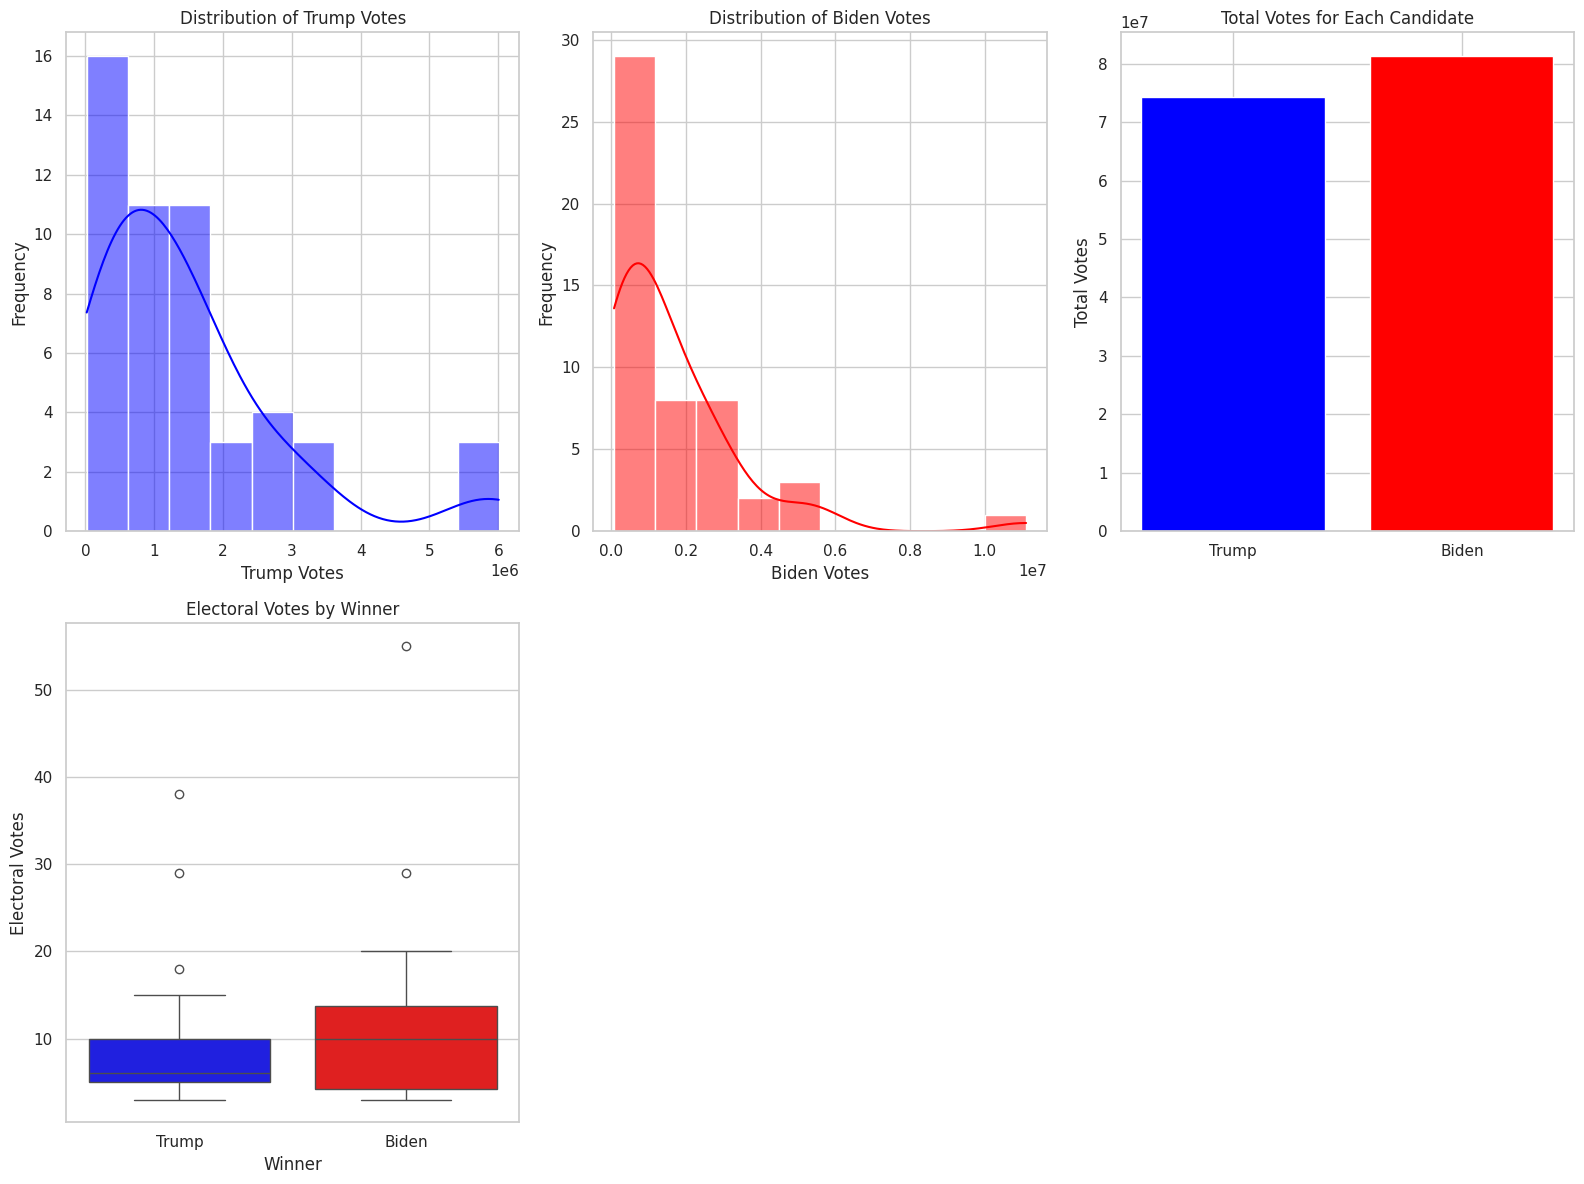

In [17]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a figure with multiple plots
plt.figure(figsize=(16, 12))

# Plot distribution of Trump Votes
plt.subplot(2, 3, 1)
sns.histplot(voting_df_2020['Trump Votes'], bins=10, kde=True, color='blue')
plt.title('Distribution of Trump Votes')
plt.xlabel('Trump Votes')
plt.ylabel('Frequency')

# Plot distribution of Biden Votes
plt.subplot(2, 3, 2)
sns.histplot(voting_df_2020['Biden Votes'], bins=10, kde=True, color='red')
plt.title('Distribution of Biden Votes')
plt.xlabel('Biden Votes')
plt.ylabel('Frequency')

# Bar plot for total votes per candidate
plt.subplot(2, 3, 3)
plt.bar(['Trump', 'Biden'], [voting_df_2020['Trump Votes'].sum(), voting_df_2020['Biden Votes'].sum()], color=['blue', 'red'])
plt.title('Total Votes for Each Candidate')
plt.ylabel('Total Votes')

# Comparison of Electoral Votes by Winner
plt.subplot(2, 3, 4)
sns.boxplot(x='Winner', y='Electoral Votes', data=voting_df_2020, palette={'Trump': 'blue', 'Biden': 'red'})
plt.title('Electoral Votes by Winner')

# Adjust layout and show all plots
plt.tight_layout()
plt.show()

In [18]:
# Mapping state names to abbreviations, which Plotly uses for US state maps
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'District Of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map state abbreviations to the dataset
voting_df_2020['State Abbreviation'] = voting_df_2020['State'].map(state_abbreviations)

# Map color by Winner and show Electoral Votes
fig = px.choropleth(
    data_frame=voting_df_2020,
    locations='State Abbreviation',
    locationmode='USA-states',
    color='Winner',  # Color by 'Winner' column
    color_discrete_map={'Trump': 'red', 'Biden': 'blue'},
    scope="usa",
    hover_name='State',
    hover_data={'Electoral Votes': True, 'State Abbreviation': False}
)

# Add title
fig.update_layout(
    title_text="2020 US Election Results by State",
    title_x=0.5,
    geo=dict(showcoastlines=True),
)

# Display the plot
fig.show()

## 📊 Dataset 2: Active Polling Data

This section introduces the active polling data used to provide insights into public sentiment during the 2020 election.

In [19]:
polling_df_2024 = pd.read_csv('./dataset/president_polls.csv')

# Display column information to check data types and missing values
print(polling_df_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18095 entries, 0 to 18094
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    18095 non-null  int64  
 1   pollster_id                18095 non-null  int64  
 2   pollster                   18095 non-null  object 
 3   sponsor_ids                8482 non-null   object 
 4   sponsors                   8482 non-null   object 
 5   display_name               18095 non-null  object 
 6   pollster_rating_id         18095 non-null  int64  
 7   pollster_rating_name       18095 non-null  object 
 8   numeric_grade              15901 non-null  float64
 9   pollscore                  15915 non-null  float64
 10  methodology                16995 non-null  object 
 11  transparency_score         14886 non-null  float64
 12  state                      10071 non-null  object 
 13  start_date                 18095 non-null  obj

### 📋 Explanation of Key Columns in `president_polls.csv`

Here is a brief explanation of the key columns from the `president_polls.csv` dataset based on the file structure and common polling data fields:

1. **poll_id**: Unique identifier for each poll.
2. **pollster_id**: Unique identifier for the pollster (organization conducting the poll).
3. **pollster**: Name of the organization conducting the poll.
4. **sponsor_ids**: Unique identifier(s) for the sponsor(s) of the poll (if applicable).
5. **sponsors**: Name(s) of the sponsor(s) funding or supporting the poll.
6. **display_name**: The name used to display the poll in reports or visualizations.
7. **pollster_rating_id**: Unique identifier for the rating system used to evaluate the pollster.
8. **pollster_rating_name**: The name of the rating system or organization evaluating the pollster.
9. **numeric_grade**: A numerical grade assigned to the pollster, often based on reliability, transparency, and past performance.
10. **pollscore**: A score that evaluates how well a pollster's results align with actual election outcomes.
11. **methodology**: The method used to conduct the poll (e.g., "Online Ad," "Phone Survey").
12. **transparency_score**: A score indicating how transparent the pollster is with their methodology and data.
13. **state**: The U.S. state where the poll was conducted, if applicable.
14. **start_date**: The date when polling began.
15. **end_date**: The date when polling ended.
16. **sample_size**: The number of respondents included in the poll.
17. **population**: The population type surveyed (e.g., "lv" for likely voters, "rv" for registered voters).
18. **tracking**: Indicates whether this is a tracking poll (True/False).
19. **created_at**: Timestamp indicating when this polling data was created or added to the dataset.
20. **party**: Political party of the candidate being polled (e.g., DEM for Democrat, REP for Republican).
21. **candidate_name**: Name of the candidate being polled.
22. **pct**: Percentage of respondents who ind


### 🔍 Feature Types in Dataset

**Categorical Features**
- **Categorical Variables**:
  - `pollster`, `display_name`, `methodology`, `state`, `population`, `population_full`, `party`, `answer`, `candidate_name`

**Numerically Encoded Categorical Variables**
- **IDs as Encoded Categories**:
  - `poll_id`, `pollster_id`, `pollster_rating_id`, `question_id`, `race_id`, `candidate_id`

**Date-Time Features**
- **Date-Time Variables (to be encoded)**:
  - `start_date`, `end_date`, `created_at`

**Continuous Numeric Features**
- **Numeric Values**:
  - `numeric_grade`, `pollscore`, `transparency_score`, `sample_size`, `percentage` (or `pct`)

**Constant Features**
- **Irrelevant and Constant Variables** (to be dropped as they do not impact the target variable, `percentage`):
  - `cycle`, `office_type`, `seat_number`, `stage`, `nationwide_batch`, `ranked_choice_reallocated`, `hypothetical`, `election_date`

**Planned Feature Reduction**  
To simplify the dataset and focus on predictive features:
1. **Drop Constant Features**: Not influential for `percentage` calculation.
2. **Remove Irrelevant Features**: Exclude URL data and other unnecessary identifiers.
3. **Exclude Redundant or Duplicate Information**:
   - Duplicate columns without added value, such as:
     - `pollster`, `display_name`, and `pollster_rating_name`
     - `answer` and `candidate_name`
     - `population` and `population_full`

This filtering will help retain only relevant variables for analyzing or predicting election outcomes.

In [23]:
# Check for missing values
missing_values = polling_df_2024.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(polling_df_2024)) * 100

# Display missing values with their percentages
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
sponsor_ids,9613,53.125173
sponsors,9613,53.125173
numeric_grade,2194,12.124896
pollscore,2180,12.047527
methodology,1100,6.079027
transparency_score,3209,17.734181
state,8024,44.343741
sponsor_candidate_id,17762,98.159713
sponsor_candidate,17762,98.159713
sponsor_candidate_party,17762,98.159713


In [24]:
# Display the columns of the dataset
print("Columns in the `polling_df_2024` dataset:")
print(polling_df_2024.columns)

Columns in the `polling_df_2024` dataset:
Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'numeric_grade', 'pollscore', 'methodology', 'transparency_score',
       'state', 'start_date', 'end_date', 'sponsor_candidate_id',
       'sponsor_candidate', 'sponsor_candidate_party', 'endorsed_candidate_id',
       'endorsed_candidate_name', 'endorsed_candidate_party', 'question_id',
       'sample_size', 'population', 'subpopulation', 'population_full',
       'tracking', 'created_at', 'notes', 'url', 'url_article', 'url_topline',
       'url_crosstab', 'source', 'internal', 'partisan', 'race_id', 'cycle',
       'office_type', 'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'hypothetical', 'party', 'answer', 'candidate_id', 'candidate_name',
       'pct'],
      dtype='object')


In [27]:
# Keeping only relevant columns

temp = polling_df_2024[['pollster','pollscore','numeric_grade', 'methodology', 'transparency_score'
                       , 'state', 'start_date', 'end_date', 'sample_size', 'population', 'election_date',
                       'party', 'answer', 'candidate_id', 'candidate_name','pct']]

print("Filtered dataset with relevant columns:")
temp

Filtered dataset with relevant columns:


,pollster,pollscore,numeric_grade,methodology,transparency_score,state,start_date,end_date,sample_size,population,election_date,party,answer,candidate_id,candidate_name,pct
0,AtlasIntel,-0.8,2.7,Online Ad,6.0,NaN,11/3/24,11/4/24,2703.0,lv,11/5/24,DEM,Harris,16661,Kamala Harris,48.1
1,AtlasIntel,-0.8,2.7,Online Ad,6.0,NaN,11/3/24,11/4/24,2703.0,lv,11/5/24,REP,Trump,16651,Donald Trump,49.2
2,AtlasIntel,-0.8,2.7,Online Ad,6.0,NaN,11/3/24,11/4/24,2703.0,lv,11/5/24,GRE,Stein,31116,Jill Stein,1.1
3,AtlasIntel,-0.8,2.7,Online Ad,6.0,NaN,11/3/24,11/4/24,2703.0,lv,11/5/24,IND,West,31097,Cornel West,0.3
4,AtlasIntel,-0.8,2.7,Online Ad,6.0,NaN,11/3/24,11/4/24,2703.0,lv,11/5/24,LIB,Oliver,31790,Chase Oliver,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,Ipsos,-0.9,2.8,Probability Panel,NaN,NaN,4/12/21,4/16/21,1106.0,a,11/5/24,REP,DeSantis,16646,Ron DeSantis,25.0
18091,Ipsos,-0.9,2.8,Probability Panel,NaN,NaN,4/12/21,4/16/21,1107.0,a,11/5/24,DEM,Biden,19368,Joe Biden,44.0
18092,Ipsos,-0.9,2.8,Probability Panel,NaN,NaN,4/12/21,4/16/21,1107.0,a,11/5/24,REP,Haley,16640,Nikki Haley,19.0
18093,PEM Management Corporation,NaN,NaN,Live Phone,NaN,NaN,4/3/21,4/7/21,1000.0,lv,11/5/24,DEM,Biden,19368,Joe Biden,46.4


In [28]:
# Fill missing numeric values with the median to handle missing data effectively
temp['numeric_grade'].fillna(temp['numeric_grade'].median(), inplace=True)
temp['pollscore'].fillna(temp['pollscore'].median(), inplace=True)
temp['transparency_score'].fillna(temp['transparency_score'].median(), inplace=True)
temp['sample_size'].fillna(temp['sample_size'].median(), inplace=True)

# Convert date columns to datetime format for easier handling
temp['start_date'] = pd.to_datetime(temp['start_date'])
temp['end_date'] = pd.to_datetime(temp['end_date'])

# Drop any remaining duplicate rows to ensure data quality
temp.drop_duplicates(inplace=True)

# Display the shape of the cleaned dataframe
print("Shape of the cleaned dataset:", temp.shape)

Shape of the cleaned dataset: (17635, 16)


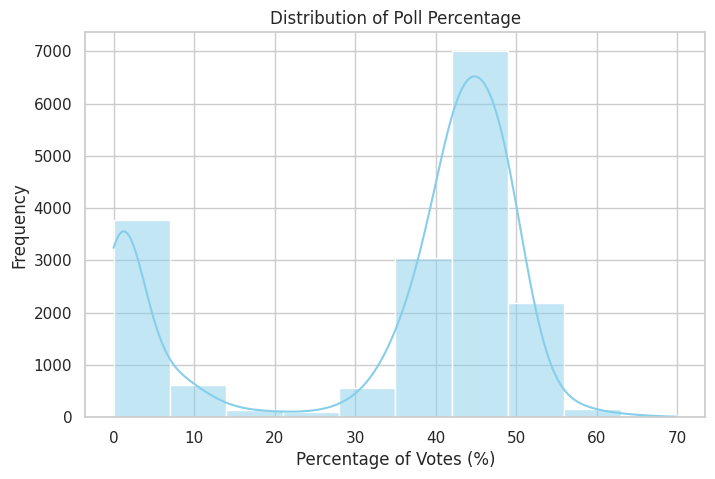

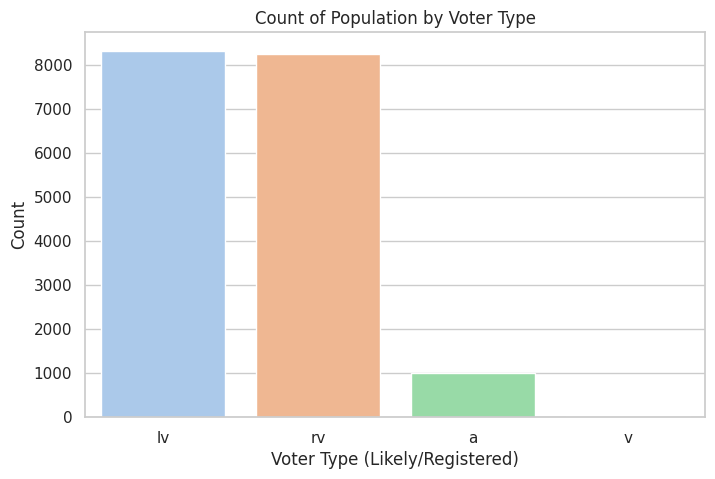

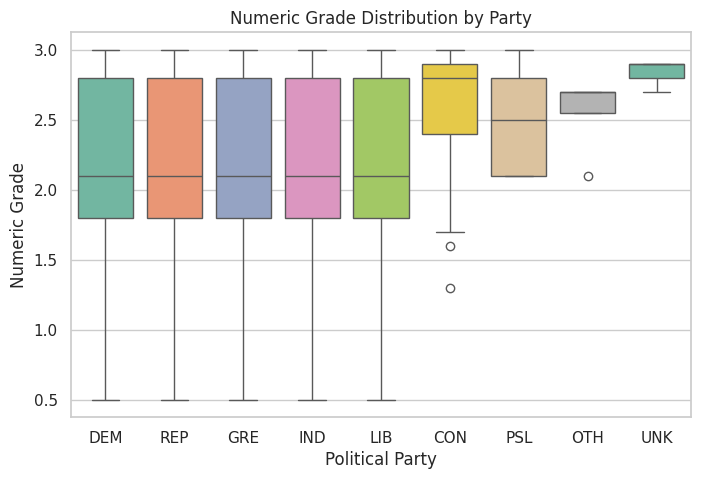

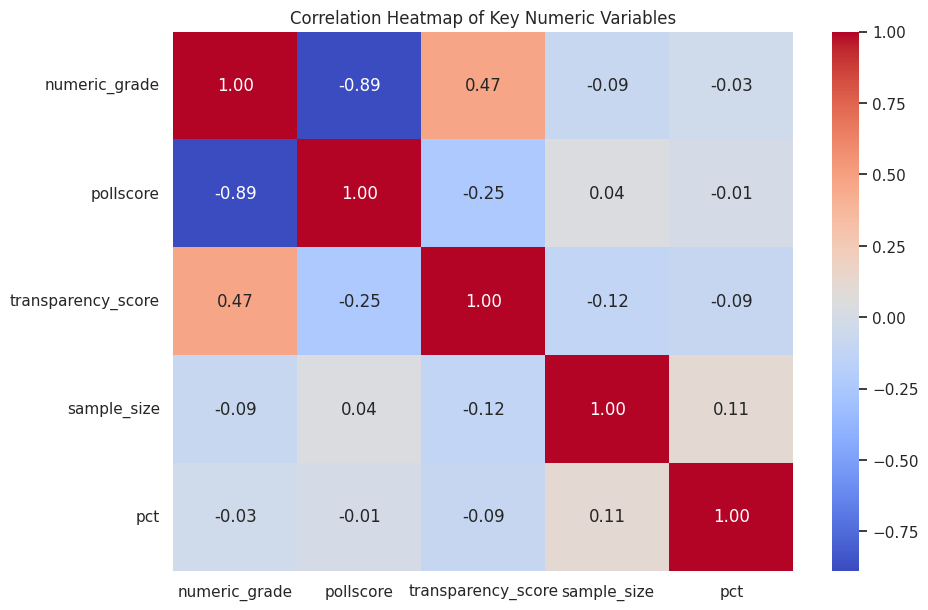

In [29]:
# Set the style for seaborn plots
sns.set(style='whitegrid')

# Plot 1: Distribution of Poll Percentages (pct)
plt.figure(figsize=(8, 5))
sns.histplot(temp['pct'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Poll Percentage')
plt.xlabel('Percentage of Votes (%)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Count of Population by Voter type
plt.figure(figsize=(8, 5))
sns.countplot(x='population', data=temp, palette='pastel')
plt.title('Count of Population by Voter Type')
plt.xlabel('Voter Type (Likely/Registered)')
plt.ylabel('Count')
plt.show()

# Plot 3: Numeric Grade Distribution by Party (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='party', y='numeric_grade', data=temp, palette='Set2')
plt.title('Numeric Grade Distribution by Party')
plt.xlabel('Political Party')
plt.ylabel('Numeric Grade')
plt.show()

# Plot 4: Correlation Heatmap between Key Numeric Variables
plt.figure(figsize=(10, 7))
correlation_matrix = temp[['numeric_grade', 'pollscore', 'transparency_score', 'sample_size', 'pct']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

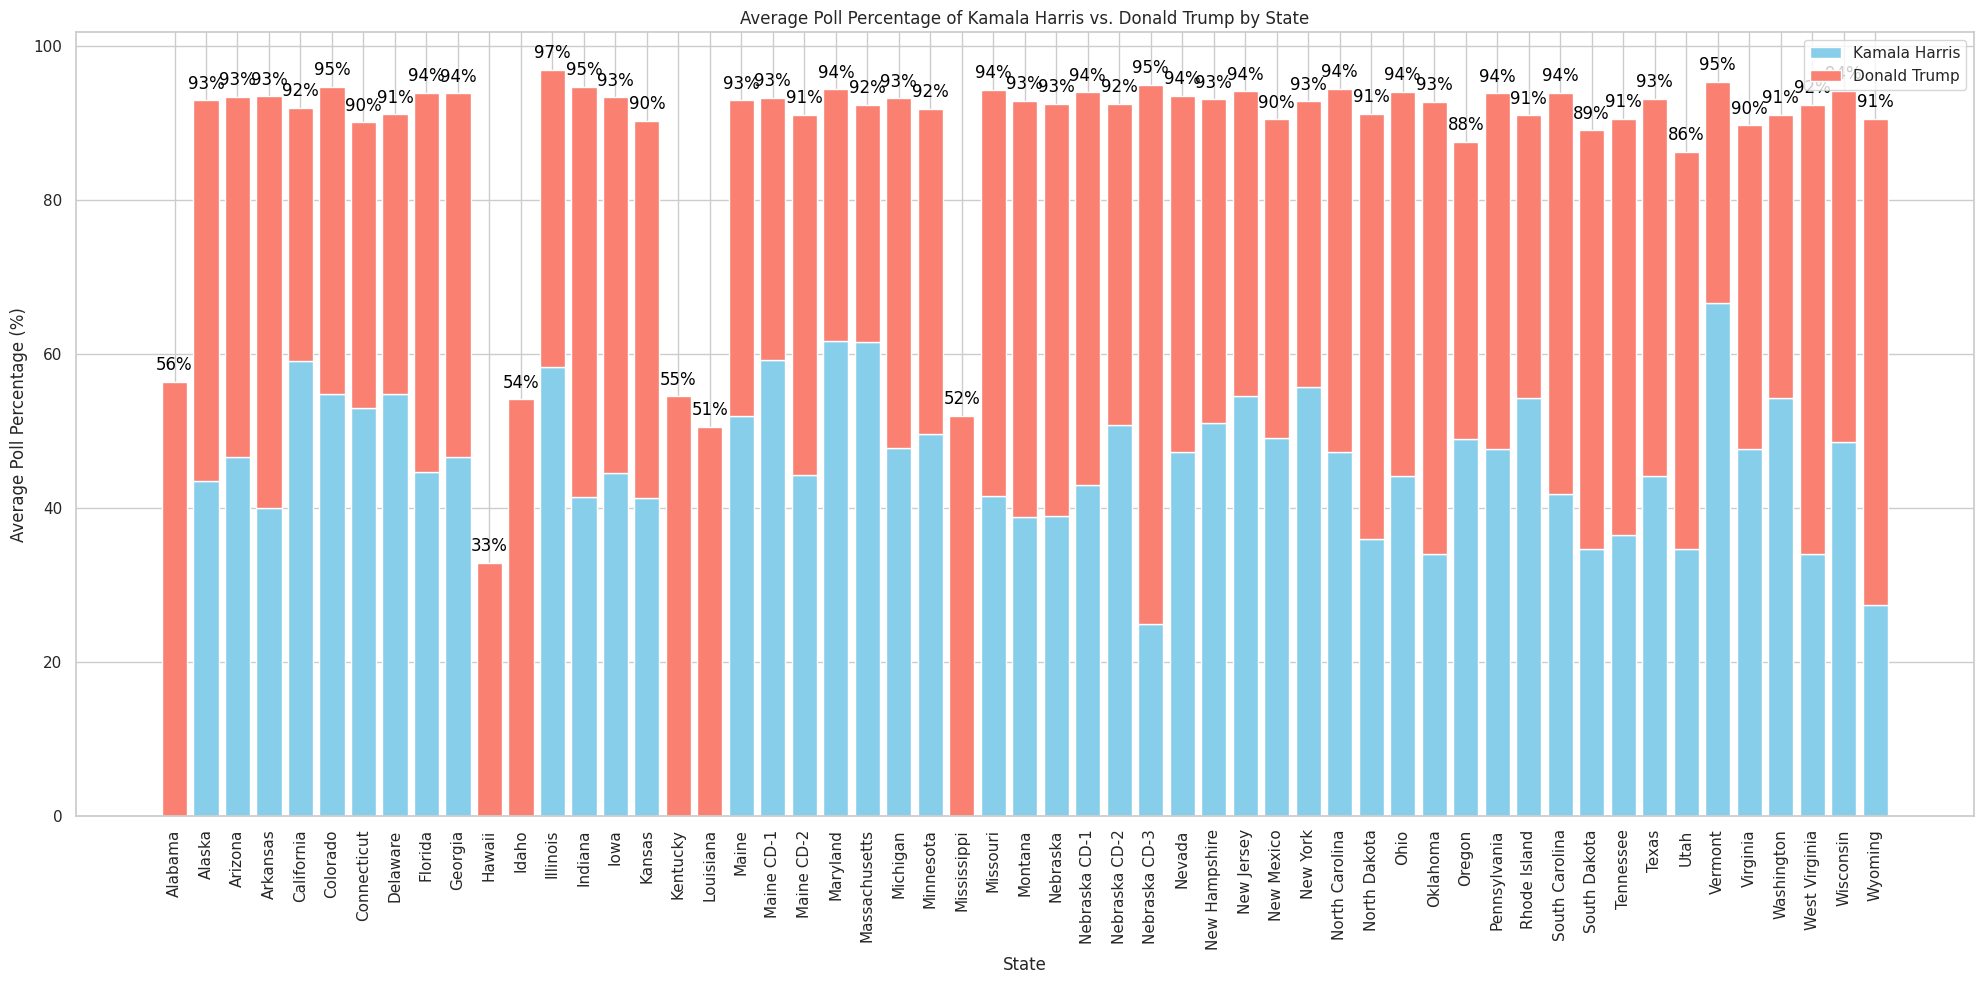

In [33]:
# Calculate the average percentage of votes for each candidate grouped by state
avg_counts = temp.groupby(['state', 'candidate_name'])['pct'].mean().reset_index()

# Filter the average counts for Kamala Harris and Donald Trump
kamala_avg = avg_counts[avg_counts['candidate_name'] == 'Kamala Harris']
trump_avg = avg_counts[avg_counts['candidate_name'] == 'Donald Trump']

# Merge the results on the 'state' column
result = pd.merge(kamala_avg, trump_avg, on='state', how='outer', suffixes=('_Harris', '_Trump'))

# Fill NaN values with 0 (in case some states don't have data for one of the candidates)
result['pct_Harris'] = result['pct_Harris'].fillna(0)
result['pct_Trump'] = result['pct_Trump'].fillna(0)

# Create a figure for stacked bar plot
plt.figure(figsize=(20, 10))

# Create stacked bar plot for Kamala Harris and Donald Trump
plt.bar(result['state'], result['pct_Harris'], label='Kamala Harris', color='skyblue')
plt.bar(result['state'], result['pct_Trump'], bottom=result['pct_Harris'], label='Donald Trump', color='salmon')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding text annotations for values (simplified to show only the higher value)
for index, (state, pct_harris, pct_trump) in enumerate(zip(result['state'], result['pct_Harris'], result['pct_Trump'])):
    total_pct = pct_harris + pct_trump
    plt.text(index, total_pct + 1, f'{round(total_pct)}%', ha='center', va='bottom', color='black')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average Poll Percentage (%)')
plt.title('Average Poll Percentage of Kamala Harris vs. Donald Trump by State')
plt.legend()

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

## 📊 Dataset 3: Polling Averages (Swing State Analysis)

This section introduces the polling averages dataset, focusing on the analysis of swing states to understand their influence on the election outcome.


In [35]:
# Reading CSV files
polls_24 = pd.read_csv('./dataset/presidential_general_averages_2024.csv')  # Updated file name for consistency
polls_20 = pd.read_csv('./dataset/presidential_poll_averages_2020.csv')
polls_until_16 = pd.read_csv('./dataset/presidential_poll_averages_1968_2016.csv')  # Updated file name for consistency

# Filter polling data for the 2024 election only
polls_24 = polls_24[polls_24['cycle'] == 2024]

# Concatenate 2020 polling data with pre-2020 polling data
polls_until_20 = pd.concat([polls_20, polls_until_16], ignore_index=True)

# Convert date columns to datetime format for easier handling
polls_24['date'] = pd.to_datetime(polls_24['date'], format='%Y-%m-%d')
polls_until_20['modeldate'] = pd.to_datetime(polls_until_20['modeldate'])

# Keep only the columns of interest for polling data
polls_until_20 = polls_until_20[['cycle', 'state', 'modeldate', 'candidate_name', 'pct_estimate', 'pct_trend_adjusted']]

# Import results data and keep necessary columns
results_until_20 = pd.read_csv('./dataset/results.csv', sep=';')
results_until_20 = results_until_20[['cycle', 'state', 'party', 'candidate', 'vote_share']]

# Display the first few rows of each dataset to confirm the data was imported correctly
print("First few rows of 2024 Polling Data:")
print(polls_24.head())

print("\nFirst few rows of Polling Data Until 2020:")
print(polls_until_20.head())

print("\nFirst few rows of Election Results Until 2020:")
print(results_until_20.head())

First few rows of 2024 Polling Data:
      candidate       date  pct_trend_adjusted    state  cycle party  \
21300     Trump 2024-11-05                 NaN  Arizona   2024   REP   
21301    Harris 2024-11-05                 NaN  Arizona   2024   DEM   
21302     Trump 2024-11-04                 NaN  Arizona   2024   REP   
21303    Harris 2024-11-04                 NaN  Arizona   2024   DEM   
21304     Trump 2024-11-03                 NaN  Arizona   2024   REP   

       pct_estimate         hi         lo  
21300      48.91625  50.027145  47.767673  
21301      46.77065  47.831710  45.717635  
21302      48.93125  49.977072  47.913935  
21303      46.75420  47.731457  45.809555  
21304      49.08275  50.121248  47.949672  

First few rows of Polling Data Until 2020:
   cycle          state  modeldate       candidate_name  pct_estimate  \
0   2020        Wyoming 2020-11-03  Joseph R. Biden Jr.      30.81486   
1   2020      Wisconsin 2020-11-03  Joseph R. Biden Jr.      52.12642   
2  

In [36]:
# Restricting the data to only include election cycles starting from 2000
start_cycle = 2000
polls_until_20 = polls_until_20[polls_until_20['cycle'] >= start_cycle]

# Defining state lists for swing, blue, and red states
swing_states = ['Pennsylvania', 'Wisconsin', 'Michigan', 'Georgia', 'North Carolina', 'Arizona', 'Nevada']
blue_states = ['District of Columbia', 'Vermont', 'Massachusetts', 'Maryland', 'Hawaii', 'California', 'ME-1', 'Connecticut',
               'Washington', 'Delaware', 'Rhode Island', 'New York', 'Illinois', 'New Jersey', 'Oregon', 'Colorado', 'Maine',
               'New Mexico', 'Virginia', 'New Hampshire', 'NE-2', 'Minnesota']
red_states = ['Wyoming', 'West Virginia', 'Oklahoma', 'North Dakota', 'Idaho', 'South Dakota', 'Arkansas', 'Kentucky',
              'NE-3', 'Alabama', 'Tennessee', 'Utah', 'Louisiana', 'Nebraska', 'Mississippi', 'Montana', 'NE-1', 'Indiana',
              'Kansas', 'Missouri', 'South Carolina', 'Alaska', 'Ohio', 'Iowa', 'Texas', 'ME-2', 'Florida']

# Creating subsets for swing state poll data until 2020 and for 2024
swing_until_20 = polls_until_20[polls_until_20['state'].isin(swing_states)]
swing_24 = polls_24[polls_24['state'].isin(swing_states)]

# Display the number of records in the swing state subsets
print(f"Number of records in swing states (until 2020): {swing_until_20.shape[0]}")
print(f"Number of records in swing states (2024): {swing_24.shape[0]}")

Number of records in swing states (until 2020): 7989
Number of records in swing states (2024): 4492


## 🔍 Data Exploration

In this section, we will explore the dataset to better understand the patterns, distributions, and correlations that may influence the election outcome.


In [37]:
# Create a DataFrame with states and their categories
state_data = {
    'State': swing_states + blue_states + red_states,
    'Category': ['Swing'] * len(swing_states) + ['Blue'] * len(blue_states) + ['Red'] * len(red_states)
}
df = pd.DataFrame(state_data)

# Generate state abbreviations using a function
def generate_state_abbreviations():
    abbreviations = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
        'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
        'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
        'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
        'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
        'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
        'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'ME-1': 'ME', 'ME-2': 'ME',
        'NE-1': 'NE', 'NE-2': 'NE', 'NE-3': 'NE'
    }
    return abbreviations

# Map state abbreviations to the DataFrame
state_abbreviations = generate_state_abbreviations()
df['State Abbreviation'] = df['State'].map(state_abbreviations)

# Display the DataFrame to verify correct mapping
print("DataFrame with state categories and abbreviations:")
print(df.head())

# Plotting with Plotly
fig = px.choropleth(
    df,
    locations='State Abbreviation',
    locationmode='USA-states',
    color='Category',
    color_discrete_map={'Swing': 'purple', 'Blue': 'blue', 'Red': 'red'},
    scope="usa",
    hover_name='State'
)

# Add title to the map
fig.update_layout(
    title_text="2020 US Election State Categories",
    title_x=0.5,
    geo=dict(showcoastlines=True),
)

# Display the map
fig.show()

DataFrame with state categories and abbreviations:
            State Category State Abbreviation
0    Pennsylvania    Swing                 PA
1       Wisconsin    Swing                 WI
2        Michigan    Swing                 MI
3         Georgia    Swing                 GA
4  North Carolina    Swing                 NC


📊 Average Support by Party and State Category (2020)

This cell explores the average voter support for each party across different state categories (Swing, Blue, Red) during the 2020 election.


Aggregated Votes by State Category:
  Category  Trump Votes  Biden Votes  Republican Support (%)  \
0     Blue     25658134     40420149               38.829904   
1      Red     27706950     20139089               57.908555   
2    Swing     20859235     20725428               50.160885   

   Democratic Support (%)  
0               61.170096  
1               42.091445  
2               49.839115  


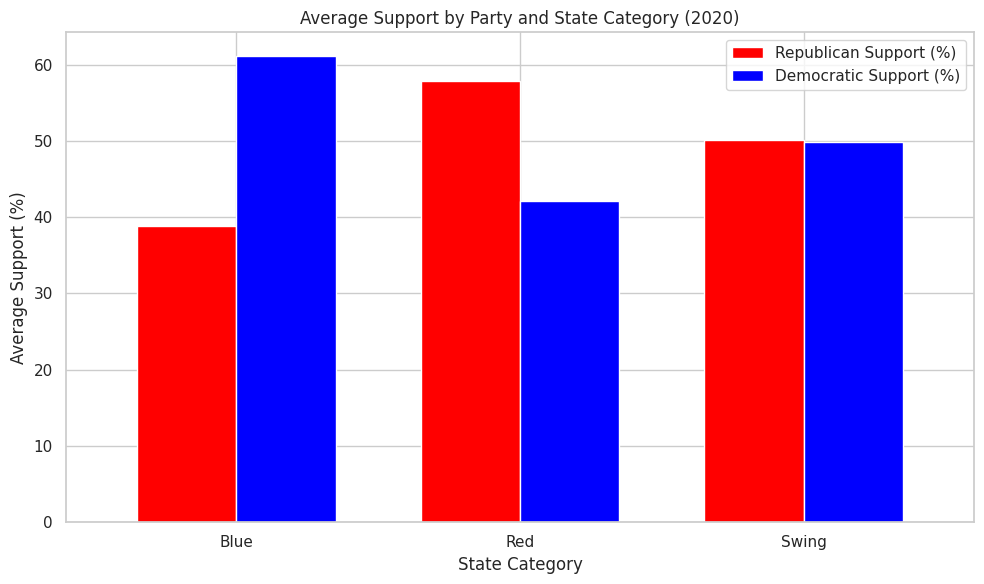

In [38]:
# Assuming `voting_df_2020` is already available and processed

# Define a threshold for a "swing" state (e.g., within 5%)
threshold = 0.05

# Calculate vote percentage for each candidate
voting_df_2020['Trump Vote Percentage'] = voting_df_2020['Trump Votes'] / (voting_df_2020['Trump Votes'] + voting_df_2020['Biden Votes'])
voting_df_2020['Biden Vote Percentage'] = voting_df_2020['Biden Votes'] / (voting_df_2020['Trump Votes'] + voting_df_2020['Biden Votes'])

# Classify each state as Swing, Red, or Blue based on the threshold
def classify_state(row):
    if abs(row['Trump Vote Percentage'] - row['Biden Vote Percentage']) < threshold:
        return 'Swing'
    elif row['Trump Vote Percentage'] > row['Biden Vote Percentage']:
        return 'Red'
    else:
        return 'Blue'

voting_df_2020['Category'] = voting_df_2020.apply(classify_state, axis=1)

# Aggregate the total votes by category for each party
category_votes = voting_df_2020.groupby('Category').agg({'Trump Votes': 'sum', 'Biden Votes': 'sum'}).reset_index()

# Calculate average polling support for each party in each category
category_votes['Republican Support (%)'] = (category_votes['Trump Votes'] / (category_votes['Trump Votes'] + category_votes['Biden Votes'])) * 100
category_votes['Democratic Support (%)'] = (category_votes['Biden Votes'] / (category_votes['Trump Votes'] + category_votes['Biden Votes'])) * 100

# Display the aggregated data for verification
print("Aggregated Votes by State Category:")
print(category_votes)

# Prepare data for plotting
plot_data = category_votes.set_index('Category')[['Republican Support (%)', 'Democratic Support (%)']]

# Plotting the bar chart to show average support by party and state category
plot_data.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'], width=0.7)

# Add title and labels to the plot
plt.title('Average Support by Party and State Category (2020)')
plt.xlabel('State Category')
plt.ylabel('Average Support (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [39]:
# Exploratory Data Analysis (EDA): Checking for missing values

# Check for missing values in swing_24 dataset
print("Missing Values in Swing States Polling Data (2024):")
print(swing_24.isnull().sum())

# Calculate and display percentage of missing values for swing_24
missing_percentage_swing_24 = (swing_24.isnull().sum() / len(swing_24)) * 100
print("\nPercentage of Missing Values in Swing States Polling Data (2024):")
print(missing_percentage_swing_24)

# Check for missing values in swing_until_20 dataset
print("\nMissing Values in Swing States Polling Data (Until 2020):")
print(swing_until_20.isnull().sum())

# Calculate and display percentage of missing values for swing_until_20
missing_percentage_swing_until_20 = (swing_until_20.isnull().sum() / len(swing_until_20)) * 100
print("\nPercentage of Missing Values in Swing States Polling Data (Until 2020):")
print(missing_percentage_swing_until_20)

Missing Values in Swing States Polling Data (2024):
candidate                0
date                     0
pct_trend_adjusted    4492
state                    0
cycle                    0
party                    0
pct_estimate             0
hi                       0
lo                       0
dtype: int64

Percentage of Missing Values in Swing States Polling Data (2024):
candidate               0.0
date                    0.0
pct_trend_adjusted    100.0
state                   0.0
cycle                   0.0
party                   0.0
pct_estimate            0.0
hi                      0.0
lo                      0.0
dtype: float64

Missing Values in Swing States Polling Data (Until 2020):
cycle                 0
state                 0
modeldate             0
candidate_name        0
pct_estimate          0
pct_trend_adjusted    0
dtype: int64

Percentage of Missing Values in Swing States Polling Data (Until 2020):
cycle                 0.0
state                 0.0
modeldate        

In [40]:
# Print summary information for the 2024 data
print('2024 Data Summary:')
print(f" - Earliest Polling Date: {swing_24['date'].min()}")
print(f" - Latest Polling Date: {swing_24['date'].max()}")
print(f" - Distinct States: {swing_24['state'].unique().tolist()}")
print(f" - Distinct Parties: {swing_24['party'].unique().tolist()}")
print(f" - Distinct Candidates: {swing_24['candidate'].unique().tolist()}")

# Print summary information for the historical data (until 2020)
print('\nHistorical Data Summary (Until 2020):')
print(f" - Earliest Polling Date: {swing_until_20['modeldate'].min()}")
print(f" - Latest Polling Date: {swing_until_20['modeldate'].max()}")
print(f" - Distinct States: {swing_until_20['state'].unique().tolist()}")
print(f" - Distinct Candidates: {swing_until_20['candidate_name'].unique().tolist()}")

2024 Data Summary:
 - Earliest Polling Date: 2024-03-01 00:00:00
 - Latest Polling Date: 2024-11-05 00:00:00
 - Distinct States: ['Arizona', 'Georgia', 'Michigan', 'Nevada', 'North Carolina', 'Pennsylvania', 'Wisconsin']
 - Distinct Parties: ['REP', 'DEM', 'IND']
 - Distinct Candidates: ['Trump', 'Harris', 'Kennedy', 'Biden']

Historical Data Summary (Until 2020):
 - Earliest Polling Date: 2016-03-03 00:00:00
 - Latest Polling Date: 2020-11-03 00:00:00
 - Distinct States: ['Wisconsin', 'Pennsylvania', 'North Carolina', 'Nevada', 'Michigan', 'Georgia', 'Arizona']
 - Distinct Candidates: ['Joseph R. Biden Jr.', 'Donald Trump', 'Convention Bounce for Joseph R. Biden Jr.', 'Convention Bounce for Donald Trump', 'Hillary Rodham Clinton', 'Gary Johnson']


In [41]:
# Filtering out rows where the candidate name starts with 'Convention Bounce' as they are not relevant to this analysis
print(f"Shape before filtering 'Convention Bounce': {swing_until_20.shape}")

swing_until_20 = swing_until_20[~swing_until_20['candidate_name'].str.startswith('Convention Bounce')]

# Display the shape after filtering to verify the change
print(f"Shape after filtering 'Convention Bounce': {swing_until_20.shape}")

Shape before filtering 'Convention Bounce': (7989, 6)
Shape after filtering 'Convention Bounce': (6960, 6)


In [44]:
# Check the correlation between estimated and trend-adjusted percentages in swing states
adj_corr_swing = swing_until_20['pct_estimate'].corr(swing_until_20['pct_trend_adjusted'])
print(f"Correlation between estimated and trend-adjusted percentage in swing states: {adj_corr_swing:.2f}")

# Calculate the mean difference between estimated and trend-adjusted percentage across swing states
mean_diff = (swing_until_20['pct_estimate'] - swing_until_20['pct_trend_adjusted']).mean()
print(f"Mean difference between estimated and trend-adjusted percentage in swing states: {mean_diff:.2f}")

Correlation between estimated and trend-adjusted percentage in swing states: 1.00
Mean difference between estimated and trend-adjusted percentage in swing states: 0.38


In [45]:
# Filter swing state data for the 2020 election cycle only
swing_20 = swing_until_20[swing_until_20['cycle'] == 2020]

# Rank candidates based on estimated and trend-adjusted percentages within each state and model date
swing_20['rank_estimate'] = swing_20.groupby(['state', 'modeldate'])['pct_estimate'].rank(ascending=False)
swing_20['rank_trend_adjusted'] = swing_20.groupby(['state', 'modeldate'])['pct_trend_adjusted'].rank(ascending=False)

# Identify rows where the candidate rankings are different for estimated vs. trend-adjusted percentages
different_rankings_swing = swing_20[swing_20['rank_estimate'] != swing_20['rank_trend_adjusted']]

# Print the number of observations with differing leaders and the last occurrence of such differences
print(f"Number of observations with differing leader: {different_rankings_swing.shape[0] // 2}")
print(f"Last occurrence of differing rankings: {different_rankings_swing['modeldate'].max()}")

Number of observations with differing leader: 34
Last occurrence of differing rankings: 2020-06-24 00:00:00


In [46]:
# Feature Engineering: Adding Party Information and Merging with Historical Results

# Get unique candidate names from swing states polling data
candidate_names = swing_until_20['candidate_name'].unique().tolist()

# Create a dictionary to map candidates to their political parties
party_map = {
    'Joseph R. Biden Jr.': 'DEM', 'Donald Trump': 'REP', 'Hillary Rodham Clinton': 'DEM',
    'Gary Johnson': 'LIB', 'Barack Obama': 'DEM', 'Mitt Romney': 'REP', 'John McCain': 'REP',
    'Ralph Nader': 'IND', 'George W. Bush': 'REP', 'John Kerry': 'DEM', 'Al Gore': 'DEM',
    'Pat Buchanan': 'REF', 'Bob Dole': 'REP', 'Bill Clinton': 'DEM', 'H. Ross Perot': 'IND',
    'George Bush': 'REP', 'Michael S. Dukakis': 'DEM', 'Walter F. Mondale': 'DEM',
    'Ronald Reagan': 'REP', 'Jimmy Carter': 'DEM', 'John B. Anderson': 'IND', 'Gerald R. Ford': 'REP',
    'George S. McGovern': 'DEM', 'Barry Goldwater': 'REP', 'Hubert Humphrey, Jr.': 'DEM',
    'Richard M. Nixon': 'REP', 'George Wallace': 'IND', 'Eugene McCarthy': 'IND'
}

# Create a DataFrame with candidates and their respective parties
candidate_df = pd.DataFrame(candidate_names, columns=['candidate_name'])
candidate_df['party'] = candidate_df['candidate_name'].map(party_map)

# Merge the candidate DataFrame with swing_until_20 on 'candidate_name' column
swing_until_20 = swing_until_20.merge(candidate_df[['candidate_name', 'party']], on='candidate_name', how='left')

# Merge historical election results (results_until_20) to swing_until_20
swing_until_20 = pd.merge(
    swing_until_20,
    results_until_20,
    how='left',
    left_on=['cycle', 'state', 'party', 'candidate_name'],
    right_on=['cycle', 'state', 'party', 'candidate']
)

# Clean vote_share column and convert to numeric type
swing_until_20['vote_share'] = swing_until_20['vote_share'].str.replace(',', '.')
swing_until_20['vote_share'] = pd.to_numeric(swing_until_20['vote_share'])

# Check for missing values after merging
print("Number of missing values per column after merging:")
print(swing_until_20.isnull().sum())

Number of missing values per column after merging:
cycle                   0
state                   0
modeldate               0
candidate_name          0
pct_estimate            0
pct_trend_adjusted      0
party                   0
candidate             814
vote_share            814
dtype: int64


In [47]:
# Aligning Column Names for Consistency Across Datasets

# Rename 'modeldate' column in swing_until_20 to 'date' for consistency with swing_24
swing_until_20.rename(columns={'modeldate': 'date'}, inplace=True)

# Keep only relevant columns for analysis
swing_24 = swing_24[['cycle', 'date', 'state', 'party', 'candidate', 'pct_estimate']]
swing_until_20 = swing_until_20[['cycle', 'date', 'state', 'party', 'candidate', 'pct_estimate', 'vote_share']]

# Update candidate names in swing_24 for consistency across datasets
swing_24['candidate'] = swing_24['candidate'].replace({
    'Trump': 'Donald Trump',
    'Biden': 'Joseph R. Biden Jr.',
    'Harris': 'Kamala Harris',
    'Kennedy': 'Robert F. Kennedy'
})

# Check for missing values after renaming and filtering columns
print("Number of missing values per column after aligning columns and updating candidate names:")
print(swing_24.isnull().sum())
print(swing_until_20.isnull().sum())

Number of missing values per column after aligning columns and updating candidate names:
cycle           0
date            0
state           0
party           0
candidate       0
pct_estimate    0
dtype: int64
cycle             0
date              0
state             0
party             0
candidate       814
pct_estimate      0
vote_share      814
dtype: int64


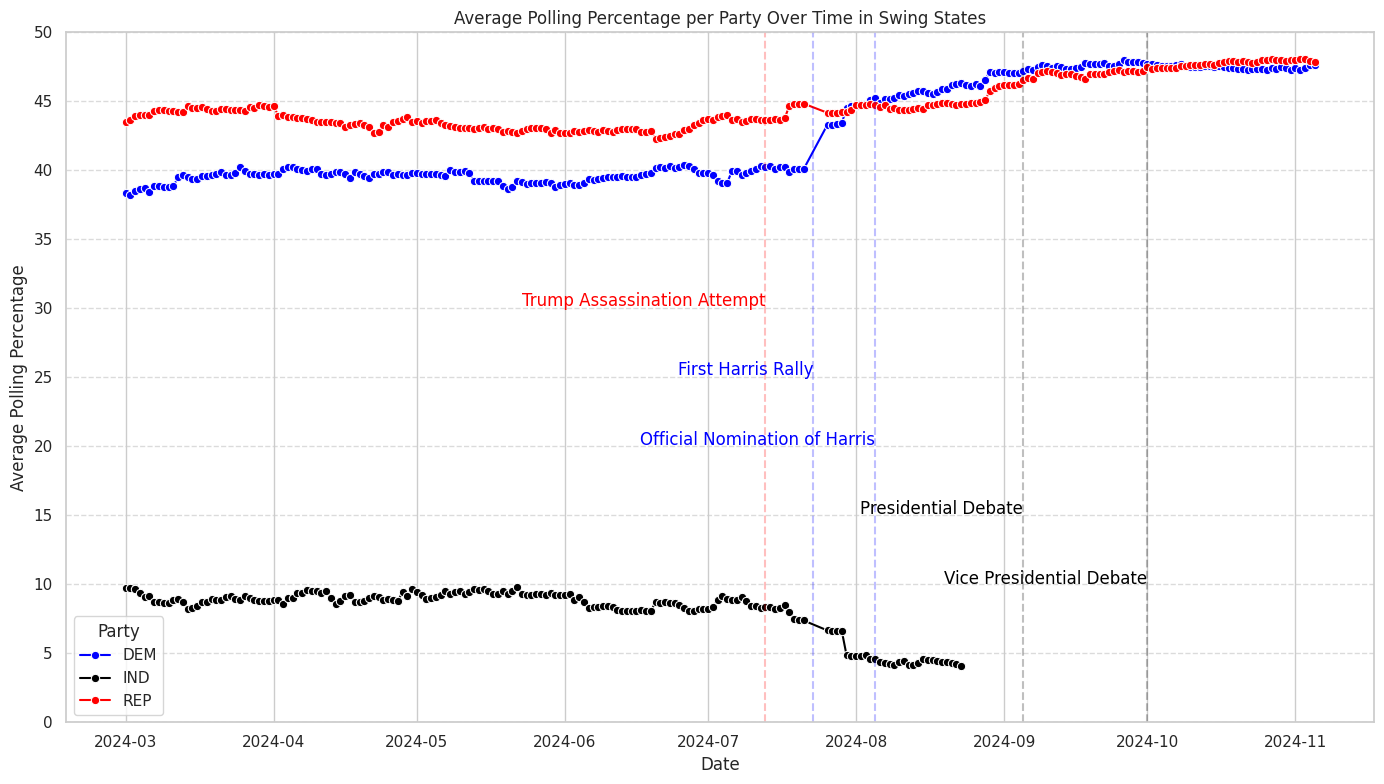

In [48]:
# Ensure the date column is in datetime format for consistency
swing_24['date'] = pd.to_datetime(swing_24['date'])

# Group by date and party, then calculate the average pct_estimate
swing_24_grouped = swing_24.groupby(['date', 'party'])['pct_estimate'].mean().reset_index()

# Create the line chart to visualize average polling percentage over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=swing_24_grouped, x='date', y='pct_estimate', hue='party', marker='o', palette={'REP': 'red', 'DEM': 'blue', 'IND': 'black'})

# Add vertical lines for significant political events
plt.axvline(pd.to_datetime('2024-07-13'), color='red', linestyle='--', alpha=0.25)  # Trump Assassination Attempt
plt.axvline(pd.to_datetime('2024-08-05'), color='blue', linestyle='--', alpha=0.25)  # Official Nomination of Harris
plt.axvline(pd.to_datetime('2024-07-23'), color='blue', linestyle='--', alpha=0.25)  # First Harris Rally
plt.axvline(pd.to_datetime('2024-09-05'), color='black', linestyle='--', alpha=0.25)  # Presidential Debate
plt.axvline(pd.to_datetime('2024-10-01'), color='black', linestyle='--', alpha=0.25)  # Vice Presidential Debate

# Add text annotations to indicate significant events
plt.text(pd.to_datetime('2024-07-13'), plt.ylim()[1] * 0.6, 'Trump Assassination Attempt', color='red', ha='right')
plt.text(pd.to_datetime('2024-07-23'), plt.ylim()[1] * 0.5, 'First Harris Rally', color='blue', ha='right')
plt.text(pd.to_datetime('2024-08-05'), plt.ylim()[1] * 0.4, 'Official Nomination of Harris', color='blue', ha='right')
plt.text(pd.to_datetime('2024-09-05'), plt.ylim()[1] * 0.3, 'Presidential Debate', color='black', ha='right')
plt.text(pd.to_datetime('2024-10-01'), plt.ylim()[1] * 0.2, 'Vice Presidential Debate', color='black', ha='right')

# Add horizontal gridlines at values dividable by 5
plt.yticks(range(0, 51, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Limit the y-axis range to 50 to keep the chart clean
plt.ylim(0, 50)

# Adjust the legend to show the party names clearly
plt.legend(title='Party')

# Set the titles and labels for the chart
plt.title('Average Polling Percentage per Party Over Time in Swing States')
plt.xlabel('Date')
plt.ylabel('Average Polling Percentage')
plt.tight_layout()

# Display the plot
plt.show()

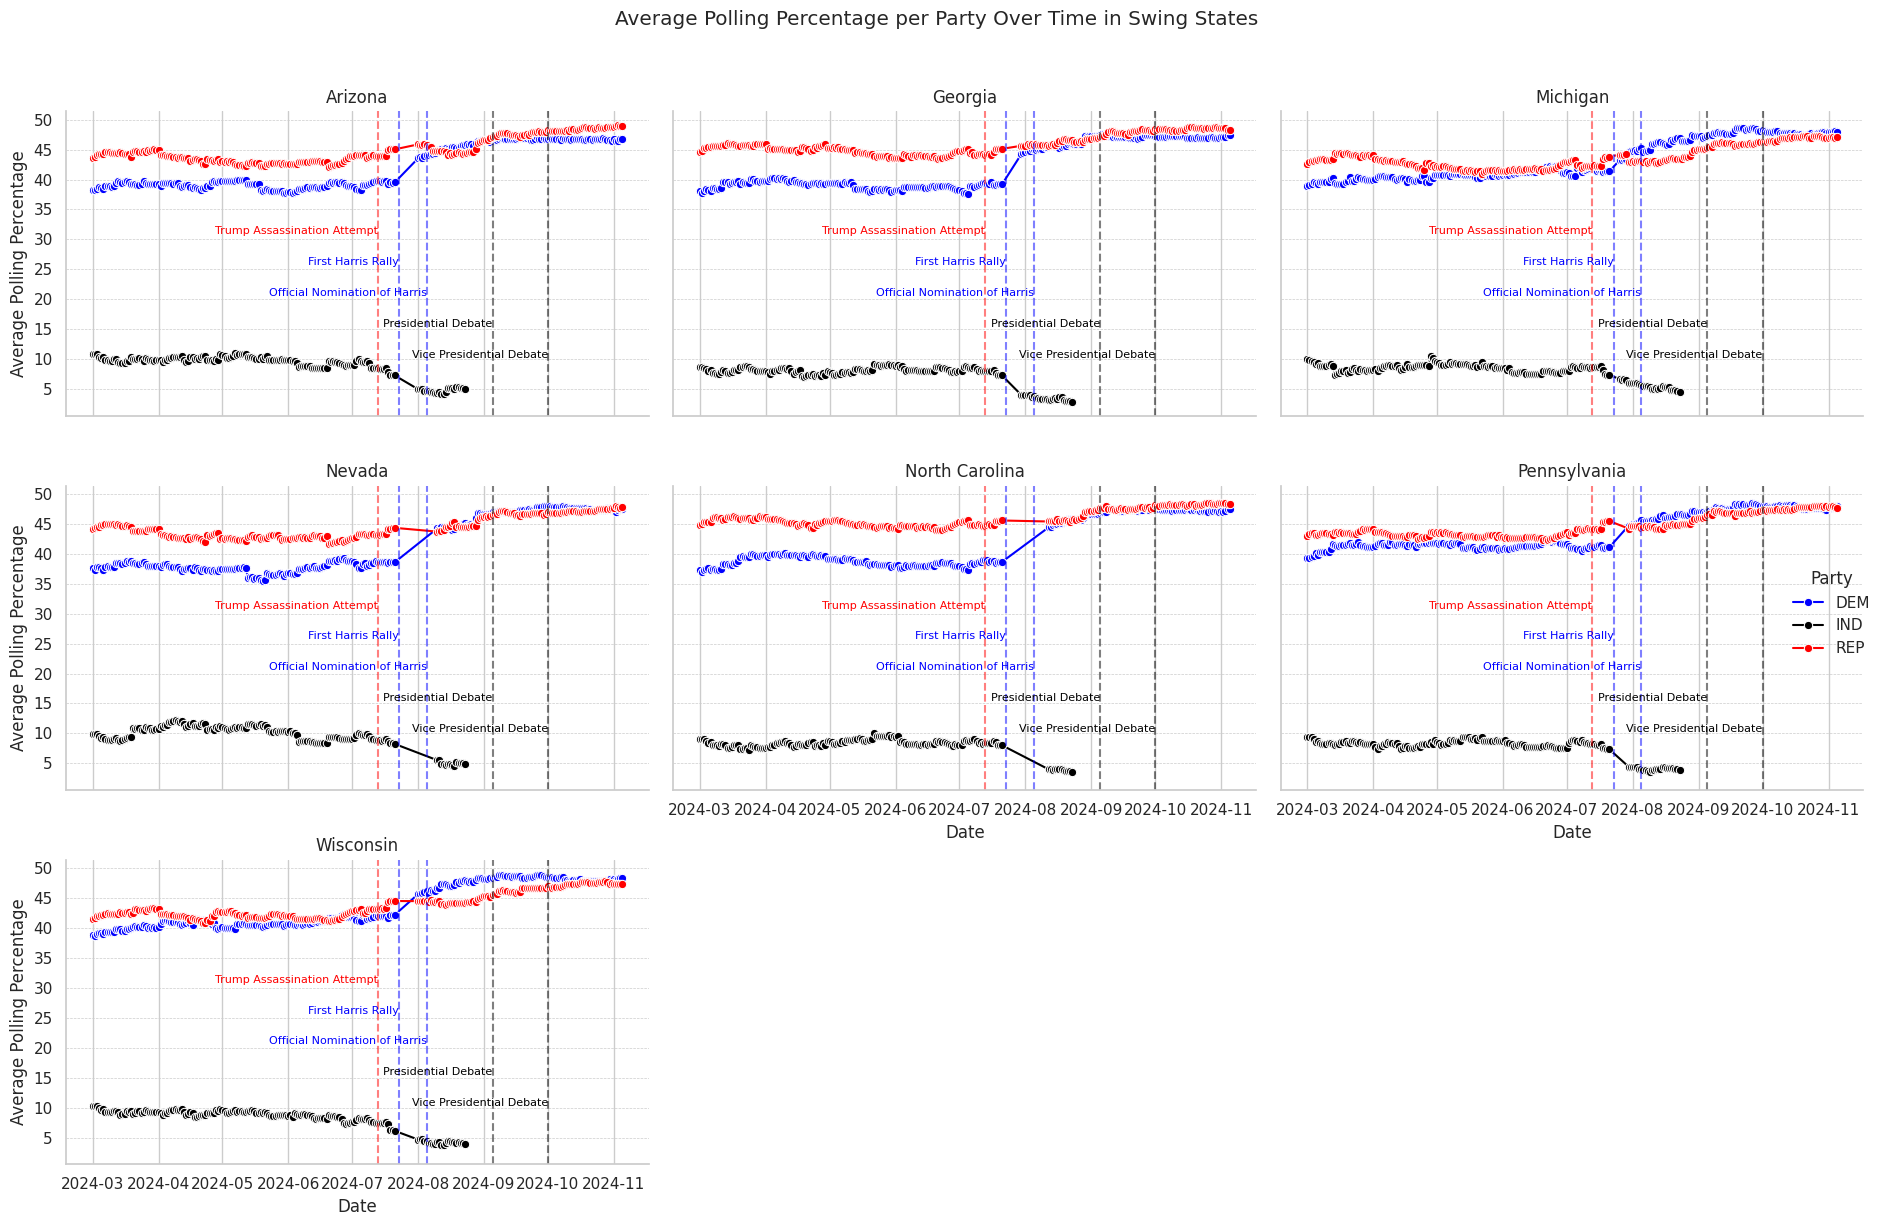

In [49]:
# Ensure the date column is in datetime format
swing_24['date'] = pd.to_datetime(swing_24['date'])

# Group by date, state, and party, then average the pct_estimate
swing_24_grouped = swing_24.groupby(['date', 'state', 'party'])['pct_estimate'].mean().reset_index()

# Create faceted line charts for each state in the swing_states list
g = sns.FacetGrid(swing_24_grouped, col='state', col_wrap=3, height=4, aspect=1.5, sharey=True)
g.map_dataframe(sns.lineplot, x='date', y='pct_estimate', hue='party', marker='o', palette={'REP': 'red', 'DEM': 'blue', 'IND': 'black'})

# Add vertical lines for significant political events
for ax in g.axes.flat:
    ax.axvline(pd.to_datetime('2024-07-13'), color='red', linestyle='--', alpha=0.5)  # Trump Assassination Attempt
    ax.axvline(pd.to_datetime('2024-08-05'), color='blue', linestyle='--', alpha=0.5)  # Official Nomination of Harris
    ax.axvline(pd.to_datetime('2024-07-23'), color='blue', linestyle='--', alpha=0.5)  # First Harris Rally
    ax.axvline(pd.to_datetime('2024-09-05'), color='black', linestyle='--', alpha=0.5)  # Presidential Debate
    ax.axvline(pd.to_datetime('2024-10-01'), color='black', linestyle='--', alpha=0.5)  # Vice Presidential Debate

    # Add text annotations to indicate significant events
    ax.text(pd.to_datetime('2024-07-13'), ax.get_ylim()[1] * 0.6, 'Trump Assassination Attempt', color='red', ha='right', fontsize=8)
    ax.text(pd.to_datetime('2024-07-23'), ax.get_ylim()[1] * 0.5, 'First Harris Rally', color='blue', ha='right', fontsize=8)
    ax.text(pd.to_datetime('2024-08-05'), ax.get_ylim()[1] * 0.4, 'Official Nomination of Harris', color='blue', ha='right', fontsize=8)
    ax.text(pd.to_datetime('2024-09-05'), ax.get_ylim()[1] * 0.3, 'Presidential Debate', color='black', ha='right', fontsize=8)
    ax.text(pd.to_datetime('2024-10-01'), ax.get_ylim()[1] * 0.2, 'Vice Presidential Debate', color='black', ha='right', fontsize=8)

    # Add horizontal gridlines at values divisible by 5 for better readability
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Adjust the legend to clearly show party affiliation
g.add_legend(title='Party')

# Set titles and labels for each subplot
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "Average Polling Percentage")

# Set an overall title for the figure
g.fig.suptitle('Average Polling Percentage per Party Over Time in Swing States', y=1.02)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
# Grouping historical data of swing states by state and party to calculate average estimates and vote shares
avg_estimates = swing_until_20.groupby(['state', 'party'])[['pct_estimate', 'vote_share']].mean()

# Display the calculated averages for verification
print("Average Polling Estimates and Vote Shares by State and Party:")
print(avg_estimates)

# Resetting the index for easier plotting
avg_estimates_reset = avg_estimates.reset_index()

# Display the reset dataframe to confirm the change
print("\nDataFrame after resetting the index:")
print(avg_estimates_reset.head())

Average Polling Estimates and Vote Shares by State and Party:
                      pct_estimate  vote_share
state          party                          
Arizona        DEM       44.886542   47.549498
               LIB        6.348085         NaN
               REP       43.410923   48.891378
Georgia        DEM       44.386895   47.831558
               LIB        6.241448         NaN
               REP       46.370851   49.894340
Michigan       DEM       47.856974   49.187784
               LIB        8.971244         NaN
               REP       40.037183   47.691804
Nevada         DEM       45.160256   49.140782
               LIB        7.140058         NaN
               REP       43.434155   46.738858
North Carolina DEM       46.137961   47.552696
               LIB        6.378542         NaN
               REP       44.645857   49.888847
Pennsylvania   DEM       47.661481   48.829819
               LIB        7.562533         NaN
               REP       42.752818   48.47352

Correlation Matrix between cycle, polling estimates, and vote shares:
                 cycle  pct_estimate  vote_share
cycle         1.000000      0.480542    0.596395
pct_estimate  0.480542      1.000000    0.492807
vote_share    0.596395      0.492807    1.000000


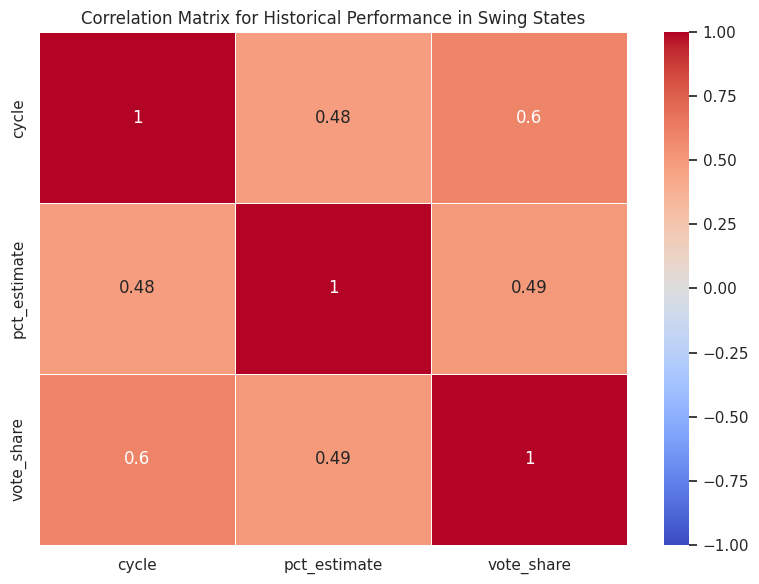

In [51]:
# Calculate the correlation matrix for historical performance in swing states
correlation = swing_until_20[['cycle', 'pct_estimate', 'vote_share']].corr()

# Print the correlation matrix with context
print("Correlation Matrix between cycle, polling estimates, and vote shares:")
print(correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Historical Performance in Swing States')
plt.tight_layout()
plt.show()

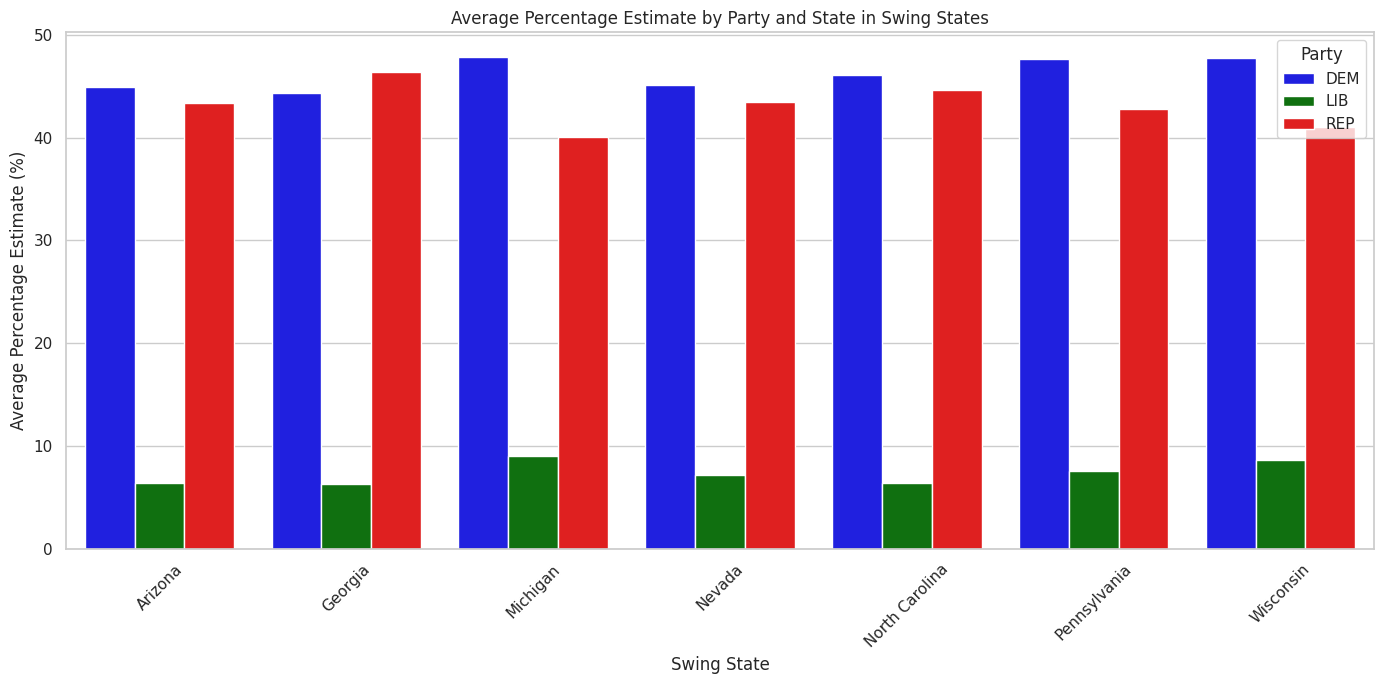

In [55]:
# Bar plot for average percentage estimate by party and state

# Set up the figure size for better readability
plt.figure(figsize=(14, 7))

# Use the DataFrame with the reset index for plotting
# Add a default color for other parties to avoid errors
sns.barplot(data=avg_estimates_reset, x='state', y='pct_estimate', hue='party', palette={'REP': 'red', 'DEM': 'blue', 'LIB': 'green'})

# Set plot title and labels for clarity
plt.title('Average Percentage Estimate by Party and State in Swing States')
plt.ylabel('Average Percentage Estimate (%)')
plt.xlabel('Swing State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the legend to show the party names clearly
plt.legend(title='Party')

# Apply tight layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()

# 🧠 Machine Learning Technique Implemented: Bayesian Model Using Beta Distribution (Baseline)

In this section, we implement a Bayesian model using a Beta distribution as our baseline approach. The Beta distribution is commonly used to model probabilities, which makes it suitable for predicting election outcomes based on polling data. This approach provides a way to quantify uncertainty in predictions, making it ideal for dealing with the inherent unpredictability of elections.


## 🌐 Scrape Latest State-Level Polling Data

In this section, we will scrape the most recent polling data for each state to ensure our analysis is based on up-to-date information. This step is crucial for accurately predicting the upcoming election outcomes.

In [56]:
# List of U.S. states in URL-friendly format for scraping purposes
US_STATES = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
    'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho',
    'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
    'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi',
    'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey',
    'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio',
    'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina',
    'south-dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
    'washington', 'west-virginia', 'wisconsin', 'wyoming', 'district-of-columbia'
]

# Dictionary mapping URL-friendly state names to their full names
STATES_TO_FULL_NAMES = {
    'alabama': 'Alabama',
    'alaska': 'Alaska',
    'arizona': 'Arizona',
    'arkansas': 'Arkansas',
    'california': 'California',
    'colorado': 'Colorado',
    'connecticut': 'Connecticut',
    'delaware': 'Delaware',
    'florida': 'Florida',
    'georgia': 'Georgia',
    'hawaii': 'Hawaii',
    'idaho': 'Idaho',
    'illinois': 'Illinois',
    'indiana': 'Indiana',
    'iowa': 'Iowa',
    'kansas': 'Kansas',
    'kentucky': 'Kentucky',
    'louisiana': 'Louisiana',
    'maine': 'Maine',
    'maryland': 'Maryland',
    'massachusetts': 'Massachusetts',
    'michigan': 'Michigan',
    'minnesota': 'Minnesota',
    'mississippi': 'Mississippi',
    'missouri': 'Missouri',
    'montana': 'Montana',
    'nebraska': 'Nebraska',
    'nevada': 'Nevada',
    'new-hampshire': 'New Hampshire',
    'new-jersey': 'New Jersey',
    'new-mexico': 'New Mexico',
    'new-york': 'New York',
    'north-carolina': 'North Carolina',
    'north-dakota': 'North Dakota',
    'ohio': 'Ohio',
    'oklahoma': 'Oklahoma',
    'oregon': 'Oregon',
    'pennsylvania': 'Pennsylvania',
    'rhode-island': 'Rhode Island',
    'south-carolina': 'South Carolina',
    'south-dakota': 'South Dakota',
    'tennessee': 'Tennessee',
    'texas': 'Texas',
    'utah': 'Utah',
    'vermont': 'Vermont',
    'virginia': 'Virginia',
    'washington': 'Washington',
    'west-virginia': 'West Virginia',
    'wisconsin': 'Wisconsin',
    'wyoming': 'Wyoming',
    'district-of-columbia': 'District Of Columbia'
}

In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_latest_poll(url, state):
    """
    Function to scrape the latest polling data for a given state.

    Args:
        url (str): A URL that accepts <state> as an argument.
        state (str): The state for which polling data is required.

    Returns:
        pd.DataFrame: A DataFrame containing the latest polling data.
    """
    try:
        # Send an HTTP GET request to the given URL
        response = requests.get(url)
        response.raise_for_status()  # Check if request was successful
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {state}: {e}")
        return None

    # Parse the response content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the latest poll rows in the table
    latest_polls = soup.find_all('tr', class_='visible-row')

    # If no polls are found, return None
    if not latest_polls:
        print(f"No polls found for {state}")
        return None

    # Initialize a dictionary to store the extracted poll data
    results_dict = {
        'State': [],
        'Date': [],
        'Sample Size': [],
        'Pollster': [],
        'Result': []
    }

    # Populate the return structure with poll data
    for latest_poll in latest_polls:
        try:
            # Extract date, sample size, pollster, and results
            date = latest_poll.find('td', class_='dates hide-mobile').get_text(strip=True)
            sample_size = latest_poll.find('td', class_='sample hide-mobile').get_text(strip=True)
            pollster = latest_poll.find('div', class_='pollster-name').get_text(strip=True)
            results = latest_poll.find('div', class_='mobile-answers-container').get_text(strip=True)

            # Append data to the results dictionary
            results_dict['State'].append(STATES_TO_FULL_NAMES[state])
            results_dict['Date'].append(date)
            results_dict['Sample Size'].append(sample_size)
            results_dict['Pollster'].append(pollster)
            results_dict['Result'].append(results)
        except AttributeError:
            # Skip if any data extraction fails for a row
            print(f"Skipping incomplete poll data for {state}")
            continue

    # Convert the results dictionary to a DataFrame
    results_df = pd.DataFrame(results_dict)

    return results_df

In [60]:
def get_poll_info(state, democratic_candidate='Harris'):
    """
    Function to retrieve and process the latest polling data for a given state.

    Args:
        state (str): The state for which polling data is required.
        democratic_candidate (str): The name of the democratic candidate (default is 'Harris').

    Returns:
        pd.DataFrame: A DataFrame containing processed polling information for the given state.
    """
    # URL of the webpage
    url = f"https://projects.fivethirtyeight.com/polls/{state}/"

    # Get the latest polls using the `get_latest_poll` function
    latest_polls = get_latest_poll(url, state)

    # If polling data is available, proceed to process it
    if latest_polls is not None and not latest_polls.empty:
        # Create a DataFrame from the latest polling data
        df = pd.DataFrame(latest_polls)

        # Only keep polls involving both Trump and the democratic candidate
        df = df[df['Result'].apply(lambda x: 'Trump' in x and democratic_candidate in x)]

        # Remove commas from sample size and convert to integer if not empty
        df['Sample Size'] = df['Sample Size'].apply(lambda x: int(x.replace(',', '')) if x.strip().isdigit() else None)

        # Drop rows where sample size is None
        df = df.dropna(subset=['Sample Size'])

        # If at least one poll is found involving both candidates, process further
        if len(df) >= 1:
            # Get the latest poll (sorted by time by default)
            df = df.iloc[[0]]

            # Extract the polling fraction for the democratic candidate and Trump using regex
            try:
                candidate_fraction = df['Result'].apply(lambda x: int(re.findall(rf'{democratic_candidate}(\d+)', x)[0]) / 100)
                trump_fraction = df['Result'].apply(lambda x: int(re.findall(r'Trump(\d+)', x)[0]) / 100)
            except (IndexError, ValueError):
                print(f"Error extracting polling fractions for {state}. Skipping.")
                return None

            # Add the polling fractions to the DataFrame
            df[f'{democratic_candidate} Poll Frac'] = candidate_fraction
            df['Trump Poll Frac'] = trump_fraction

            # Remove the 'Result' column from the DataFrame
            df = df.drop(columns=['Result'])

            return df
        else:
            # Return None if no relevant polls are found
            return None
    else:
        # Return None if no polling data is available
        return None

In [61]:
# Get the latest Harris-Trump poll for each state

# Initialize an empty list to store polling information
state_info = []

# Iterate over each state to get the latest polling information
for state in US_STATES:
    try:
        # Attempt to get Harris-Trump polling data
        poll_info = get_poll_info(state, democratic_candidate='Harris')

        # If no Harris-Trump data, attempt Biden-Trump polling data
        if poll_info is None:
            print(f'{state}: No Trump/Harris polling data available.')
            poll_info = get_poll_info(state, democratic_candidate='Biden')

            # If no Biden-Trump data, print a message
            if poll_info is None:
                print(f'{state}: No Trump/Biden polling data available.')

        # Append the polling data if available
        if poll_info is not None:
            state_info.append(poll_info)

    except Exception as e:
        # Print an error message for the state if an exception occurs
        print(f"Error processing {state}: {e}")

# Concatenate all polling information into a DataFrame
if state_info:
    state_df = pd.concat(state_info).reset_index(drop=True)
    print("Polling data successfully gathered for all available states.")
else:
    print("No polling data was found for any state.")

alabama: No Trump/Harris polling data available.
alabama: No Trump/Biden polling data available.
alaska: No Trump/Harris polling data available.
alaska: No Trump/Biden polling data available.
hawaii: No Trump/Harris polling data available.
idaho: No Trump/Harris polling data available.
kentucky: No Trump/Harris polling data available.
kentucky: No Trump/Biden polling data available.
louisiana: No Trump/Harris polling data available.
mississippi: No Trump/Harris polling data available.
mississippi: No Trump/Biden polling data available.
district-of-columbia: No Trump/Harris polling data available.
Polling data successfully gathered for all available states.


## 🛠️ Feature Engineering

In this section, we will create new features that can help improve the predictive power of our election model. Feature engineering is a critical step for extracting more meaningful information from the data.

In [62]:
# Merge voting data with state-level polling data
joined = voting_df_2020.merge(
    state_df,
    on='State',
    how='outer'
)

# Convert 'Sample Size' to a float type
joined['Sample Size'] = joined['Sample Size'].apply(lambda x: float(x))

# Create columns indicating the existence of Trump-Harris and Trump-Biden polls
joined['exists_trump_harris_poll'] = joined.apply(lambda row: not np.isnan(row['Trump Poll Frac']) and not np.isnan(row['Harris Poll Frac']), axis=1)
joined['exists_trump_biden_poll'] = joined.apply(lambda row: not np.isnan(row['Trump Poll Frac']) and not np.isnan(row['Biden Poll Frac']), axis=1)

# Fill all NaN values with 0
joined = joined.fillna(0)

# Calculate the total number of votes for each state in 2020
joined['Total Votes 2020'] = joined['Trump Votes'] + joined['Biden Votes']

# Calculate the fraction of votes for each candidate in 2020
joined['Biden Vote Fraction'] = joined['Biden Votes'] / joined['Total Votes 2020']
joined['Trump Vote Fraction'] = joined['Trump Votes'] / joined['Total Votes 2020']

# Reset the index for the joined DataFrame
joined = joined.reset_index(drop=True)

# Rebalance the polls to consider it a race between just Trump and Harris or Trump and Biden
joined['Poll Sum Fraction'] = joined.apply(lambda row: np.nansum([row['Harris Poll Frac'], row['Trump Poll Frac'], row['Biden Poll Frac']]), axis=1)
joined['Harris Poll Frac'] = joined['Harris Poll Frac'] / joined['Poll Sum Fraction']
joined['Trump Poll Frac'] = joined['Trump Poll Frac'] / joined['Poll Sum Fraction']
joined['Biden Poll Frac'] = joined['Biden Poll Frac'] / joined['Poll Sum Fraction']

In [63]:
# National polling fractions sourced from the latest available data
# Source: https://projects.fivethirtyeight.com/polls/president-general/2024/national/
# These numbers represent the latest national polling percentages for each candidate.

HARRIS_NATIONAL_POLL_FRAC = 0.48  # National polling fraction for Harris
TRUMP_NATIONAL_POLL_FRAC = 0.468  # National polling fraction for Trump

## 🗳️ Simulating the Election Using Dataset 1 and Dataset 2

In this section, we will simulate the 2024 election based on the available datasets. Dataset 1 represents historical election results, while Dataset 2 incorporates the most recent polling data. The goal is to predict how each state might vote using a combination of historical performance and polling.


In [64]:
def simulate_election(df, weight_vote, weight_poll, baseline_uncertainty=None, return_alphas_betas=False):
    """
    Simulate an election using historical data and polling data.

    Args:
        df (pd.DataFrame): DataFrame containing election and polling data.
        weight_vote (float): Weight assigned to the 2020 election results.
        weight_poll (float): Weight assigned to the recent polling data.
        baseline_uncertainty (float, optional): Baseline uncertainty value for states with missing polling data.
        return_alphas_betas (bool, optional): Whether to return the alphas and betas used for Beta distributions.

    Returns:
        tuple: Electoral votes for Harris and Trump (and optionally alphas and betas).
    """

    # Validate inputs
    if weight_vote < 0 or weight_poll < 0:
        raise ValueError("Weights must be non-negative.")
    if weight_vote + weight_poll == 0:
        raise ValueError("At least one of weight_vote or weight_poll must be positive.")

    # Get indices for each logical polling situation
    exists_trump_harris_polling = df.exists_trump_harris_poll.values
    exists_trump_biden_polling = df.exists_trump_biden_poll.values
    not_exists_polling = (~exists_trump_harris_polling) & (~exists_trump_biden_polling)

    # If we're not enforcing uncertainty, use sample size as number of votes
    if baseline_uncertainty is None:
        n_votes_vals = df['Sample Size']
    else:
        # Otherwise, set sample size to allow uncertainty to be set at the given value
        n_votes_vals = 1 / (4 * baseline_uncertainty**2) - 3
        n_votes_missing_harris_polling_vals = 1 / (4 * (1.5 * baseline_uncertainty)**2) - 3
        n_votes_missing_polling_vals = 1 / (4 * (2 * baseline_uncertainty)**2) - 3

    # Posterior alphas and betas for the Beta distribution of p(Harris) winning
    alphas = (weight_vote * n_votes_vals * df['Biden Vote Fraction'] +
              weight_poll * n_votes_vals * df['Harris Poll Frac'] + 1)
    betas = (weight_vote * n_votes_vals * df['Trump Vote Fraction'] +
             weight_poll * n_votes_vals * df['Trump Poll Frac'] + 1)

    # For states that do not have Trump/Harris polling but do have Trump/Biden polling
    alphas[exists_trump_biden_polling] = (
        weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Vote Fraction'] +
        weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Biden Poll Frac'] + 1
    )
    betas[exists_trump_biden_polling] = (
        weight_vote * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Vote Fraction'] +
        weight_poll * n_votes_missing_harris_polling_vals * df.iloc[exists_trump_biden_polling]['Trump Poll Frac'] + 1
    )

    # For states that have no polling data at all
    alphas[not_exists_polling] = (
        weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Biden Vote Fraction'] +
        weight_poll * n_votes_missing_polling_vals * HARRIS_NATIONAL_POLL_FRAC + 1
    )
    betas[not_exists_polling] = (
        weight_vote * n_votes_missing_polling_vals * df.iloc[not_exists_polling]['Trump Vote Fraction'] +
        weight_poll * n_votes_missing_polling_vals * TRUMP_NATIONAL_POLL_FRAC + 1
    )

    # Using these alphas and betas, simulate the probability that Harris would win
    p_wins = [np.random.beta(a, b) for a, b in zip(alphas, betas)]
    harris_wins = np.array([p > 0.5 for p in p_wins])
    harris_evotes = df[harris_wins]['Electoral Votes'].sum()
    trump_evotes = df[~harris_wins]['Electoral Votes'].sum()

    if return_alphas_betas:
        return harris_evotes, trump_evotes, alphas, betas

    return harris_evotes, trump_evotes

In [65]:
# Set the number of simulations to be run for the election prediction model
n_sims = 100  # Number of times to simulate the election to estimate the probability of each outcome

In [66]:
# Set the baseline uncertainty level (this should decrease as we get closer to election day)
# Lower baseline uncertainty indicates greater confidence in the polling data.
BASELINE_UNCERTAINTY = 0.02  # Typical range is 0.02-0.05 depending on proximity to election day

In [67]:
from tqdm import tqdm

results = []

# Iterate over several choices of voting and polling weights
for weight_vote in tqdm(np.arange(0.01, 1.01, 0.01), desc="Simulating elections for different weights"):
    weight_vote = round(weight_vote, 10)
    weight_poll = round(1 - weight_vote, 10)

    # Skip iterations where polling weight is negative (just a precaution)
    if weight_poll < 0:
        continue

    # Perform n_sims simulations for each combination of weights
    for _ in range(n_sims):
        harris_evotes, trump_evotes = simulate_election(joined, weight_vote, weight_poll, BASELINE_UNCERTAINTY)
        results.append([weight_vote, weight_poll, harris_evotes, trump_evotes])

# Convert results to a DataFrame for further analysis
results = pd.DataFrame(columns=['weight_vote', 'weight_poll', 'harris_evotes', 'trump_evotes'], data=results)

Simulating elections for different weights: 100%|██████████| 100/100 [01:09<00:00,  1.45it/s]


In [68]:
# Aggregate results based on the weight of polling data
# Calculating the average and standard deviation of electoral votes for both Harris and Trump
stats = results.groupby('weight_poll').agg(
    avg_harris_evotes=pd.NamedAgg(column='harris_evotes', aggfunc=np.mean),
    dev_harris_evotes=pd.NamedAgg(column='harris_evotes', aggfunc=np.std),
    avg_trump_evotes=pd.NamedAgg(column='trump_evotes', aggfunc=np.mean),
    dev_trump_evotes=pd.NamedAgg(column='trump_evotes', aggfunc=np.std)
).reset_index()

# Display the aggregated results
print("Aggregated statistics for different polling weights:")
print(stats.head())

Aggregated statistics for different polling weights:
   weight_poll  avg_harris_evotes  dev_harris_evotes  avg_trump_evotes  \
0         0.00             289.50          22.981987            248.50   
1         0.01             289.20          22.593018            248.80   
2         0.02             291.00          24.021455            247.00   
3         0.03             284.10          24.768218            253.90   
4         0.04             288.11          24.584587            249.89   

   dev_trump_evotes  
0         22.981987  
1         22.593018  
2         24.021455  
3         24.768218  
4         24.584587  


## 📊 Predicted Results Using the Bayesian Method

The following section presents the election results as predicted by our Bayesian model. The Bayesian method helps us account for uncertainty in polling and historical voting data to provide a probabilistic estimate of the electoral outcome.

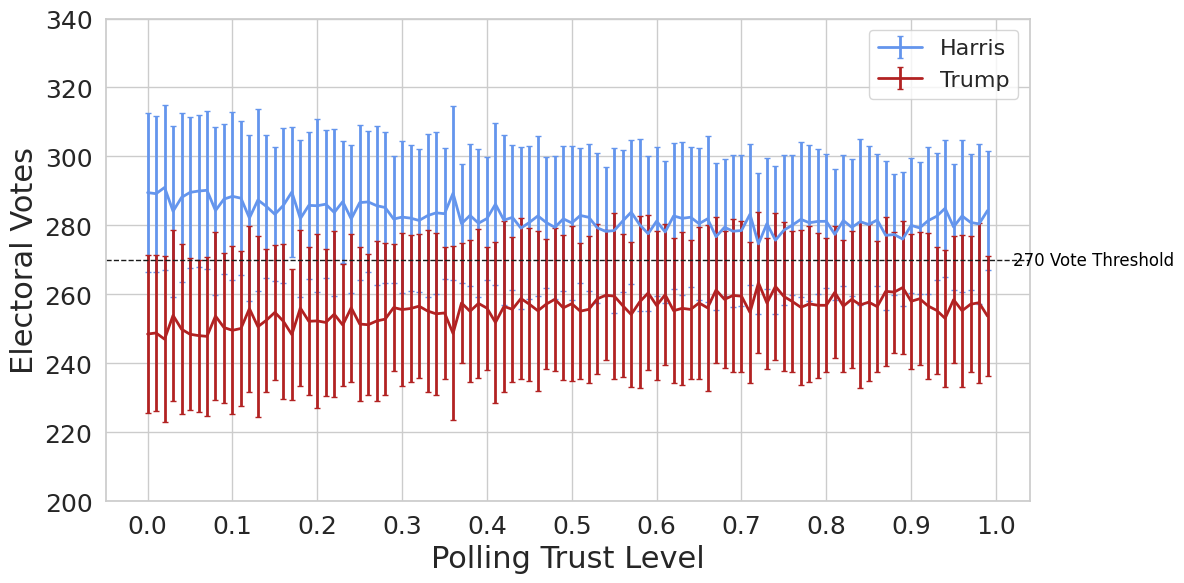

In [69]:
# Plotting the predicted electoral votes for Harris and Trump based on polling weight
plt.figure(figsize=(12, 6))

# Plot average electoral votes for Harris with error bars indicating standard deviation
plt.errorbar(stats.weight_poll, stats.avg_harris_evotes, yerr=stats.dev_harris_evotes, color='cornflowerblue', linewidth=2, capsize=2, label='Harris')

# Plot average electoral votes for Trump with error bars indicating standard deviation
plt.errorbar(stats.weight_poll, stats.avg_trump_evotes, yerr=stats.dev_trump_evotes, color='firebrick', linewidth=2, capsize=2, label='Trump')

# Add legend to distinguish between Harris and Trump
plt.legend(fontsize=16, loc='upper right')

# Add a horizontal line at 270 to indicate the winning threshold for electoral votes
plt.axhline(270, color='k', linestyle='--', linewidth=1)
plt.text(1.02, 270, '270 Vote Threshold', color='black', fontsize=12, verticalalignment='center')

# Set the y-axis limits for a clear view of the relevant vote range
plt.ylim(200, 340)

# Set x and y axis labels with appropriate font sizes
plt.xlabel('Polling Trust Level', fontsize=22)
plt.ylabel('Electoral Votes', fontsize=22)

# Customize tick marks for better readability
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.yticks(np.arange(200, 350, 20), fontsize=18)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('election_simulations.png', dpi=250)

# Display the plot
plt.show()

## 📉 Beta Distribution Chart for Predicted Outcomes

In this section, we will visualize the Beta distribution parameters (`alpha` and `beta`) used for predicting the election outcomes. This chart will help us understand how the Bayesian model evolves as we adjust the trust in polling data versus historical voting data.

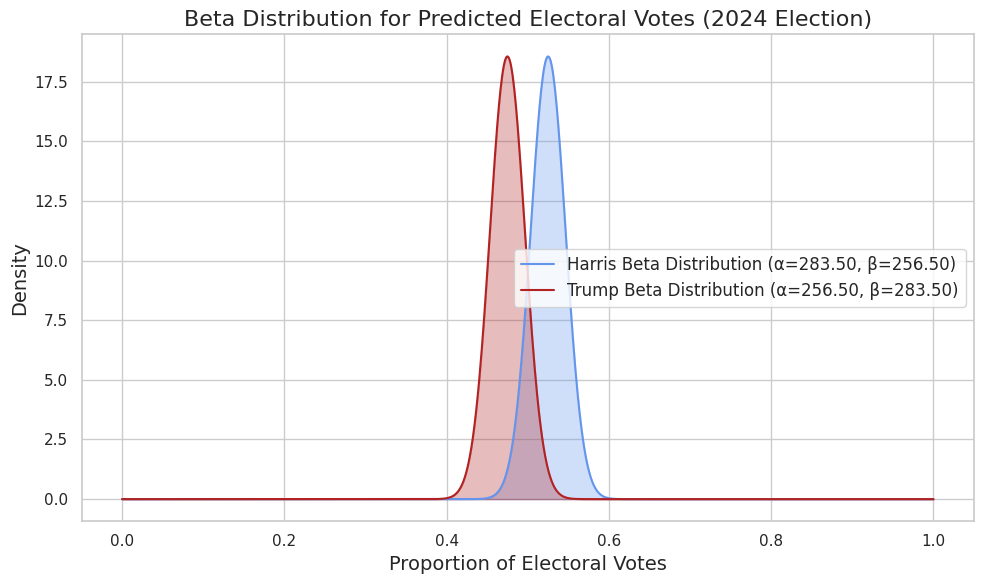

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Assuming the `stats` DataFrame contains the aggregated simulation results

# Calculate alpha and beta parameters for Harris and Trump
# Using the average electoral votes as a basis for the Beta distribution
total_electoral_votes = 538  # Total possible electoral votes

# Harris parameters
alpha_harris = stats['avg_harris_evotes'].mean() + 1  # Successes (average electoral votes for Harris) + 1
beta_harris = total_electoral_votes - stats['avg_harris_evotes'].mean() + 1  # Failures (remaining votes) + 1

# Trump parameters
alpha_trump = stats['avg_trump_evotes'].mean() + 1  # Successes (average electoral votes for Trump) + 1
beta_trump = total_electoral_votes - stats['avg_trump_evotes'].mean() + 1  # Failures (remaining votes) + 1

# Generate x values between 0 and 1 (representing possible proportion of electoral votes)
x = np.linspace(0, 1, 1000)

# Generate the beta distribution PDFs for Harris and Trump
y_harris = beta.pdf(x, alpha_harris, beta_harris)
y_trump = beta.pdf(x, alpha_trump, beta_trump)

# Plotting the Beta Distribution Chart for Harris and Trump
plt.figure(figsize=(10, 6))

# Plot Harris's beta distribution
plt.plot(x, y_harris, label=f'Harris Beta Distribution (α={alpha_harris:.2f}, β={beta_harris:.2f})', color='cornflowerblue')
plt.fill_between(x, y_harris, alpha=0.3, color='cornflowerblue')

# Plot Trump's beta distribution
plt.plot(x, y_trump, label=f'Trump Beta Distribution (α={alpha_trump:.2f}, β={beta_trump:.2f})', color='firebrick')
plt.fill_between(x, y_trump, alpha=0.3, color='firebrick')

# Add title and labels for better clarity
plt.title('Beta Distribution for Predicted Electoral Votes (2024 Election)', fontsize=16)
plt.xlabel('Proportion of Electoral Votes', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend for clarity
plt.legend(fontsize=12)

# Adjust layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()

## 📊 Baseline Model Metrics Evaluation

In [71]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, accuracy_score, brier_score_loss

# Actual electoral votes for Harris and Trump
actual_evotes = {'harris': 226, 'trump': 312}

# Calculate MAE for Harris and Trump electoral votes using the baseline model
baseline_mae_harris = mean_absolute_error([actual_evotes['harris']], [joined['Biden Vote Fraction'].mean() * 538])
baseline_mae_trump = mean_absolute_error([actual_evotes['trump']], [joined['Trump Vote Fraction'].mean() * 538])

# Calculate State-Level Accuracy for the baseline model
# Assuming the predicted winner is the candidate with the higher vote fraction
joined['predicted_winner'] = joined.apply(lambda row: 'Harris' if row['Biden Vote Fraction'] > row['Trump Vote Fraction'] else 'Trump', axis=1)
actual_results = joined[['State', 'Winner']]  # Assuming 'Winner' column contains the actual winner for each state
state_accuracy_baseline = accuracy_score(actual_results['Winner'], joined['predicted_winner'])

# Calculate Brier Score for the baseline model (assuming predicted probabilities are available)
joined['predicted_prob_harris'] = joined['Biden Vote Fraction']  # Using the vote fraction as the predicted probability
brier_score_baseline = brier_score_loss(actual_results['Winner'].apply(lambda x: 1 if x == 'Harris' else 0), joined['predicted_prob_harris'])

# Create a DataFrame to store metrics for the baseline model
baseline_metrics_data = {
    'Metric': ['MAE_Harris', 'MAE_Trump', 'State_Accuracy', 'Brier_Score'],
    'Value': [baseline_mae_harris, baseline_mae_trump, state_accuracy_baseline, brier_score_baseline]
}

baseline_metrics_df = pd.DataFrame(baseline_metrics_data)

# Display the DataFrame for verification
print(baseline_metrics_df)

# Save the metrics to a CSV file for importing into Notebook 05
baseline_metrics_df.to_csv('./result/baseline_metrics.csv', index=False)

           Metric      Value
0      MAE_Harris  41.381062
1       MAE_Trump  41.381062
2  State_Accuracy   0.490196
3     Brier_Score   0.261864


**📊 Metrics Used for Baseline Model Evaluation**

1. **MAE (Mean Absolute Error)**: Shows how off our predictions were on average. Harris and Trump both had an MAE of around 41 electoral votes, meaning the model's predictions were off by about 41 votes for each.

2. **State-Level Accuracy**: This shows how often the model correctly predicted the winner in each state. The accuracy was about 49%, which means it only did slightly better than random guessing.

3. **Brier Score**: Measures how good the model's probabilities were. The score was 0.26 (lower is better), which means there's still room to improve how well-calibrated the model is.

**📝 Short Analysis of Results**

- **MAE**: Being off by 41 votes for each candidate suggests the baseline model is quite basic and needs improvement to make more accurate predictions.
- **State-Level Accuracy**: 49% accuracy shows that the model is not doing much better than guessing, so it needs better features or methods.
- **Brier Score**: A score of 0.26 indicates that the model's predicted chances are okay but not great. It would benefit from refining the probability estimates.

Overall, the baseline model gives us a starting point, but there's a lot to improve to make better, more accurate predictions.

# 🗳️ Detailed Explanation of Election Simulation Code

The code provided simulates the outcome of a hypothetical U.S. election between Kamala Harris and Donald Trump, using a combination of historical 2020 election results and polling data. It employs a **Bayesian approach** to estimate the probabilities of Harris or Trump winning each state, based on both past voting patterns and current polling data.

## Key Concepts

### **Beta Distribution**
The simulation uses a Beta distribution to model the probability of Harris winning in each state. In a Beta distribution, two parameters, `alpha` (successes) and `beta` (failures), define the shape of the distribution. Here, `alpha` represents Harris's support, and `beta` represents Trump's support.

### **Weighting**
The simulation balances two sources of information:
- **Weight of historical voting data (`weight_vote`)**: Reflects how much trust we place in the 2020 election results being predictive of the 2024 election.
- **Weight of polling data (`weight_poll`)**: Reflects how much trust we place in recent polling data as an indicator of future voting behavior.

## Step-by-Step Explanation

### 1. **Polling Data Setup**
- The code first checks whether polling data exists for a Trump vs. Harris matchup (`exists_trump_harris_polling`) or a Trump vs. Biden matchup (`exists_trump_biden_polling`).
- If neither exists, it assumes no polling is available for that state (`not_exists_polling`).

### 2. **Handling Uncertainty**
- If no baseline uncertainty is provided, the number of votes (`n_votes_vals`) is directly taken from the dataset (`df['N Votes']`).
- If uncertainty is enforced (via `baseline_uncertainty`), sample sizes are adjusted to introduce more uncertainty into the simulation:
  - If no Trump/Harris poll exists but there is a Trump/Biden poll, the uncertainty is increased by 1.5x.
  - If no polling data exists at all, the uncertainty is doubled.

### 3. **Alpha and Beta Calculation**
- For each state, `alpha` and `beta` values are calculated based on the available data.
- If there's only Trump/Biden polling data (i.e., no direct Harris polling), Biden's vote share is used as a proxy for Harris's support.
- For states with no polling data at all, national averages (`HARRIS_NATIONAL_POLL_FRAC` and `TRUMP_NATIONAL_POLL_FRAC`) are used to estimate support.

### 4. **Simulating Election Outcomes**
- Using these `alpha` and `beta` values, the code generates random samples from the Beta distribution for each state to simulate the probability that Harris would win (`p_wins`).
- If this probability exceeds 0.5, Harris wins that state's electoral votes; otherwise, Trump wins.

### 5. **Running Multiple Simulations**
- The code runs the simulation multiple times (100 times per combination of weights) to account for variability in outcomes.
- It iterates over different combinations of `weight_vote` and `weight_poll`, ranging from fully trusting historical voting data to fully trusting polling data.

### 6. **Storing Results**
- After each simulation, the number of electoral votes won by Harris and Trump in each scenario is stored.

### 7. **Aggregating Results**
- Finally, the results are aggregated across all simulations for each combination of weights:
  - The **average number of electoral votes** won by Harris (`avg_harris_evotes`) and Trump (`avg_trump_evotes`).
  - The **standard deviation (uncertainty)** in these electoral vote counts (`dev_harris_evotes`, `dev_trump_evotes`).

## Summary
This simulation models a hypothetical election between Kamala Harris and Donald Trump by combining historical voting patterns from 2020 with recent polling data. It uses Bayesian methods to estimate win probabilities for each state and runs multiple simulations to account for uncertainty in both voting behavior and polling accuracy.

The goal is to explore how different levels of trust in historical voting patterns versus current polls might affect predictions about who would win the electoral vote count in a future election scenario.
